Dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

# **Citation:**

fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# **EDA**

In [4]:
print("Dataset Shape:", df.shape)

print("\nDataset Info:")
display(df.info())

print("\nMissing Values:")
display(df.isnull().sum())

print("\nBasic Statistics:")
display(df.describe())

print("\nClass Distribution:")
display(df['HeartDisease'].value_counts(normalize=True))


Dataset Shape: (918, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


None


Missing Values:


,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0



Basic Statistics:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000



Class Distribution:


,proportion
HeartDisease,
1,0.553377
0,0.446623


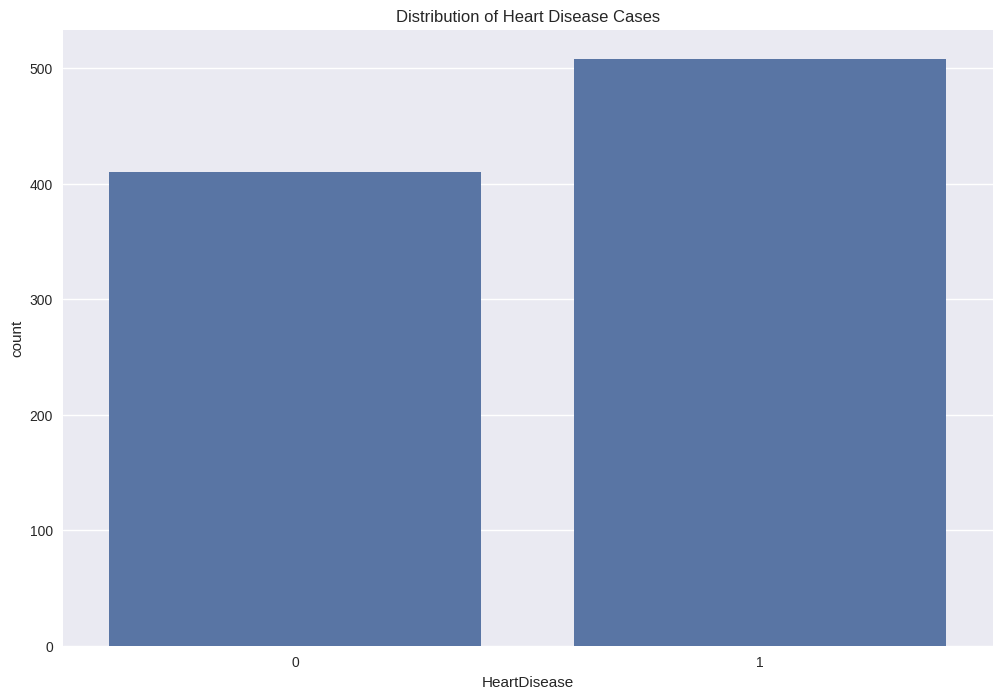

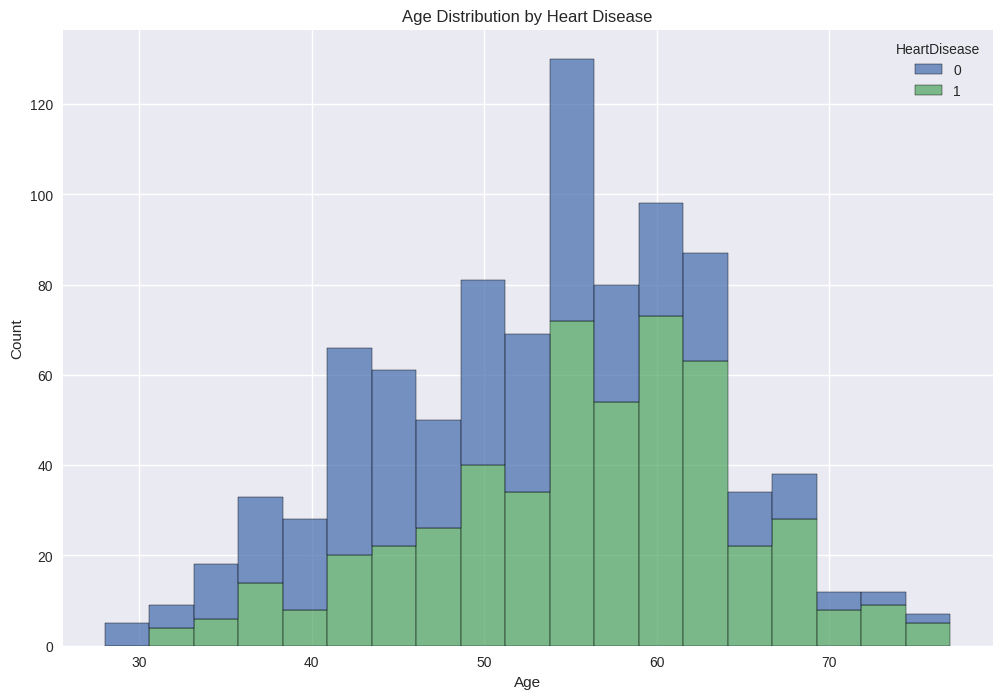

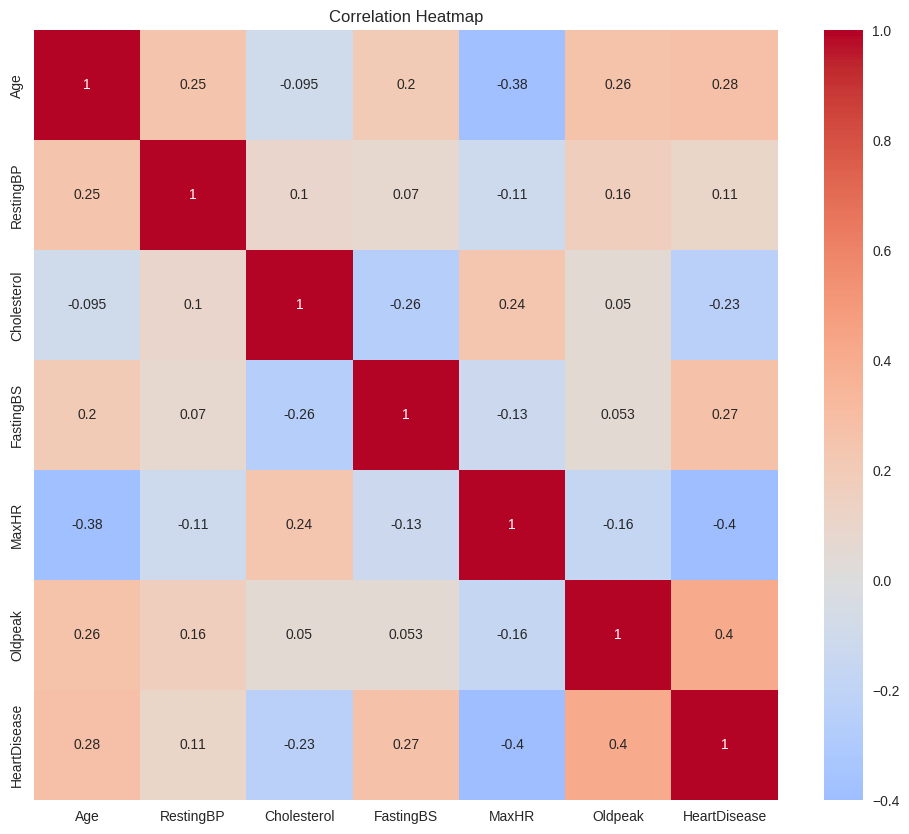

In [5]:
import seaborn as sns

# 2. Data Visualization
plt.style.use('seaborn-v0_8')

# Set up figure size for all plots
plt.rcParams['figure.figsize'] = [12, 8]

# 2.1 Target Variable Distribution
plt.figure()
sns.countplot(data=df, x='HeartDisease')
plt.title('Distribution of Heart Disease Cases')
plt.savefig('target_distribution.png')
plt.show()

# 2.2 Age Distribution by Heart Disease
plt.figure()
sns.histplot(data=df, x='Age', hue='HeartDisease', multiple="stack")
plt.title('Age Distribution by Heart Disease')
plt.savefig('age_distribution.png')
plt.show()

# 2.3 Correlation Heatmap
plt.figure(figsize=(12, 10))
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

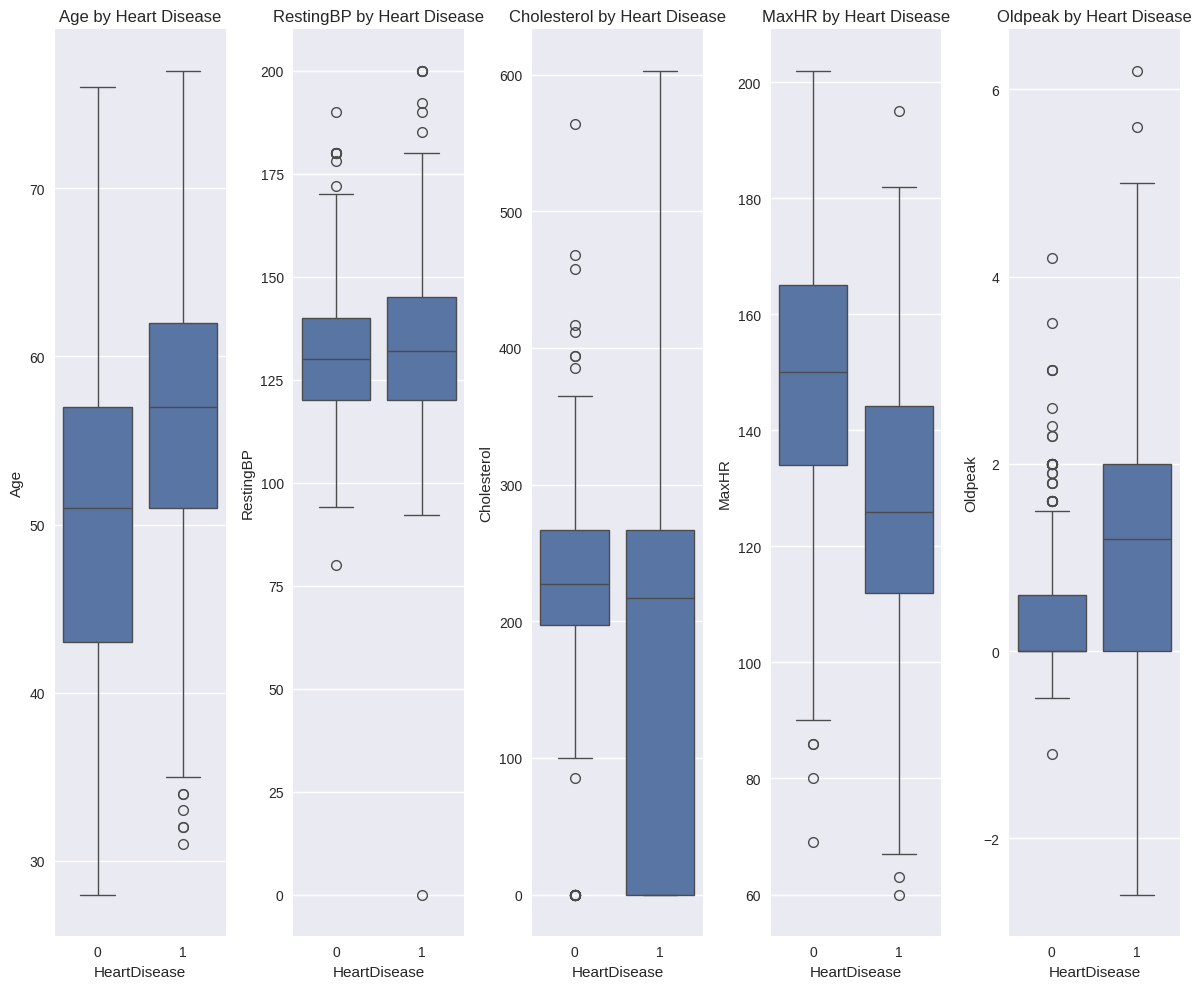

In [6]:
# 2.4 Box Plots for Numerical Features
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
fig, axes = plt.subplots(1, 5, figsize=(12, 10))
axes = axes.ravel()

for idx, feature in enumerate(numerical_features):
    sns.boxplot(data=df, x='HeartDisease', y=feature, ax=axes[idx])
    axes[idx].set_title(f'{feature} by Heart Disease')

plt.tight_layout()
plt.show()

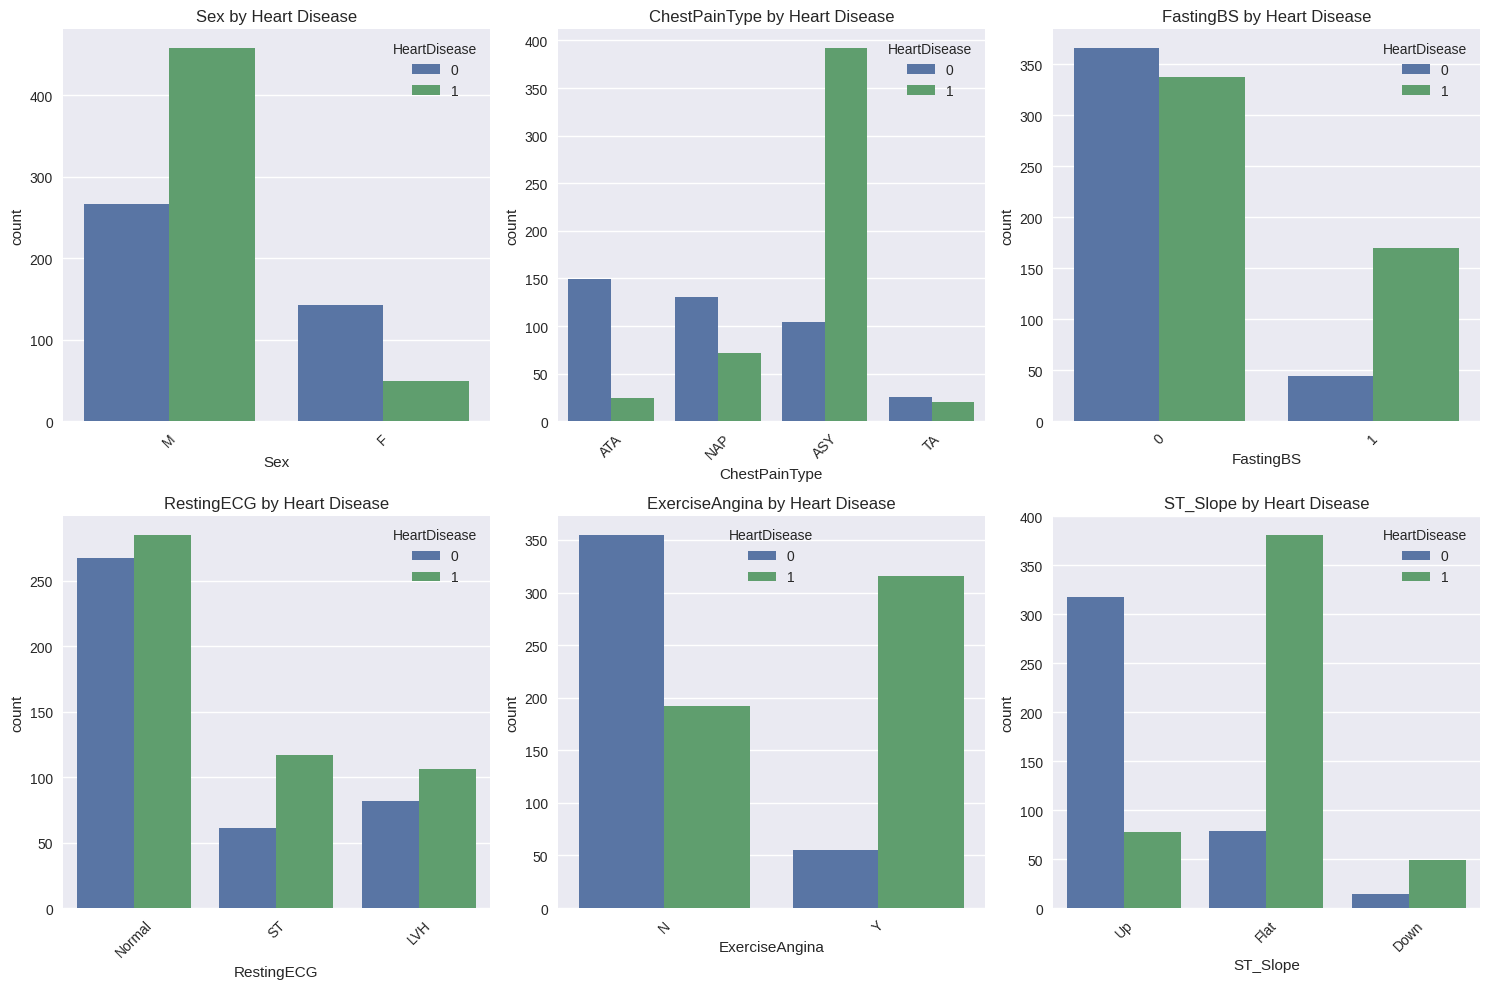

In [7]:
# 2.5 Categorical Features Analysis
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, hue='HeartDisease', ax=axes[idx])
    axes[idx].set_title(f'{feature} by Heart Disease')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('categorical_analysis.png')
plt.show()


# **Statistical Analysis**

# **Outlier Detection**

In [8]:
def check_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
    return len(outliers)

print("\nNumber of outliers in numerical features:")
for feature in numerical_features:
    outlier_count = check_outliers(df, feature)
    print(f"{feature}: {outlier_count} outliers")


Number of outliers in numerical features:
Age: 0 outliers
RestingBP: 28 outliers
Cholesterol: 183 outliers
MaxHR: 2 outliers
Oldpeak: 16 outliers


In [9]:
def analyze_cholesterol_outliers(df):
    """
    Analyze cholesterol outliers in detail, separating zero values from other outliers
    """
    # Calculate quartiles and bounds
    Q1 = df['Cholesterol'].quantile(0.25)
    Q3 = df['Cholesterol'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find zero values
    zero_values = df[df['Cholesterol'] == 0]
    zero_count = len(zero_values)

    # Find non-zero outliers
    outliers = df[(df['Cholesterol'] < lower_bound) |
                  (df['Cholesterol'] > upper_bound) &
                  (df['Cholesterol'] != 0)]
    high_outliers = df[df['Cholesterol'] > upper_bound]

    print(f"Cholesterol Analysis:")
    print(f"Lower bound: {lower_bound:.2f}")
    print(f"Upper bound: {upper_bound:.2f}")
    print(f"\nBreakdown of 183 outliers:")
    print(f"Number of zero values: {zero_count}")
    print(f"Number of non-zero outliers: {len(outliers)}")
    print(f"Number of high outliers: {len(high_outliers)}")

    # Basic statistics excluding zeros
    print("\nCholesterol statistics excluding zero values:")
    print(df[df['Cholesterol'] > 0]['Cholesterol'].describe())

    return zero_count, len(outliers), len(high_outliers)

In [10]:
# Run the analysis and store the returned values
zero_count, non_zero_outliers, high_outliers = analyze_cholesterol_outliers(df)

Cholesterol Analysis:
Lower bound: 32.62
Upper bound: 407.62

Breakdown of 183 outliers:
Number of zero values: 172
Number of non-zero outliers: 183
Number of high outliers: 11

Cholesterol statistics excluding zero values:
count    746.000000
mean     244.635389
std       59.153524
min       85.000000
25%      207.250000
50%      237.000000
75%      275.000000
max      603.000000
Name: Cholesterol, dtype: float64


In [11]:
def examine_cholesterol_data(df):
    """
    Detailed examination of Cholesterol values in the dataset
    """
    # Basic statistics
    print("1. Basic Statistics for Cholesterol:")
    print(df['Cholesterol'].describe())

    # Count zero values
    zero_count = len(df[df['Cholesterol'] == 0])
    print(f"\n2. Number of zero values: {zero_count}")

    # Calculate outlier boundaries
    Q1 = df['Cholesterol'].quantile(0.25)
    Q3 = df['Cholesterol'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"\n3. Outlier Boundaries:")
    print(f"Lower bound: {lower_bound:.2f}")
    print(f"Upper bound: {upper_bound:.2f}")

    # Count outliers by type
    low_outliers = df[(df['Cholesterol'] < lower_bound) & (df['Cholesterol'] != 0)]
    high_outliers = df[df['Cholesterol'] > upper_bound]

    print(f"\n4. Outlier Breakdown:")
    print(f"Total outliers: {len(low_outliers) + len(high_outliers) + zero_count}")
    print(f"Low outliers (excluding zeros): {len(low_outliers)}")
    print(f"High outliers: {len(high_outliers)}")
    print(f"Zero values: {zero_count}")

    # Distribution of non-zero values
    print("\n5. Statistics for non-zero Cholesterol values:")
    print(df[df['Cholesterol'] > 0]['Cholesterol'].describe())

    # Value counts for very low values
    print("\n6. Distribution of very low values (< 100):")
    print(df[df['Cholesterol'] < 100]['Cholesterol'].value_counts().sort_index())

# Run the examination
examine_cholesterol_data(df)

1. Basic Statistics for Cholesterol:
count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

2. Number of zero values: 172

3. Outlier Boundaries:
Lower bound: 32.62
Upper bound: 407.62

4. Outlier Breakdown:
Total outliers: 183
Low outliers (excluding zeros): 0
High outliers: 11
Zero values: 172

5. Statistics for non-zero Cholesterol values:
count    746.000000
mean     244.635389
std       59.153524
min       85.000000
25%      207.250000
50%      237.000000
75%      275.000000
max      603.000000
Name: Cholesterol, dtype: float64

6. Distribution of very low values (< 100):
Cholesterol
0     172
85      1
Name: count, dtype: int64


# **Chi-Square Test**

In [12]:
# 3.2 Chi-square test for categorical features
print("\nChi-square test results for categorical features:")
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['HeartDisease'])
    chi2, p_value = stats.chi2_contingency(contingency_table)[:2]
    print(f"{feature}: chi2={chi2:.2f}, p-value={p_value:.4f}")


Chi-square test results for categorical features:
Sex: chi2=84.15, p-value=0.0000
ChestPainType: chi2=268.07, p-value=0.0000
FastingBS: chi2=64.32, p-value=0.0000
RestingECG: chi2=10.93, p-value=0.0042
ExerciseAngina: chi2=222.26, p-value=0.0000
ST_Slope: chi2=355.92, p-value=0.0000


# **Feature Value Distribution**

In [13]:
# 3.3 Feature Value Distributions
for feature in categorical_features:
    print(f"\nDistribution of {feature}:")
    display(df[feature].value_counts(normalize=True))


Distribution of Sex:


,proportion
Sex,
M,0.78976
F,0.21024



Distribution of ChestPainType:


,proportion
ChestPainType,
ASY,0.540305
NAP,0.221133
ATA,0.188453
TA,0.050109



Distribution of FastingBS:


,proportion
FastingBS,
0,0.766885
1,0.233115



Distribution of RestingECG:


,proportion
RestingECG,
Normal,0.601307
LVH,0.204793
ST,0.193900



Distribution of ExerciseAngina:


,proportion
ExerciseAngina,
N,0.595861
Y,0.404139



Distribution of ST_Slope:


,proportion
ST_Slope,
Flat,0.501089
Up,0.430283
Down,0.068627


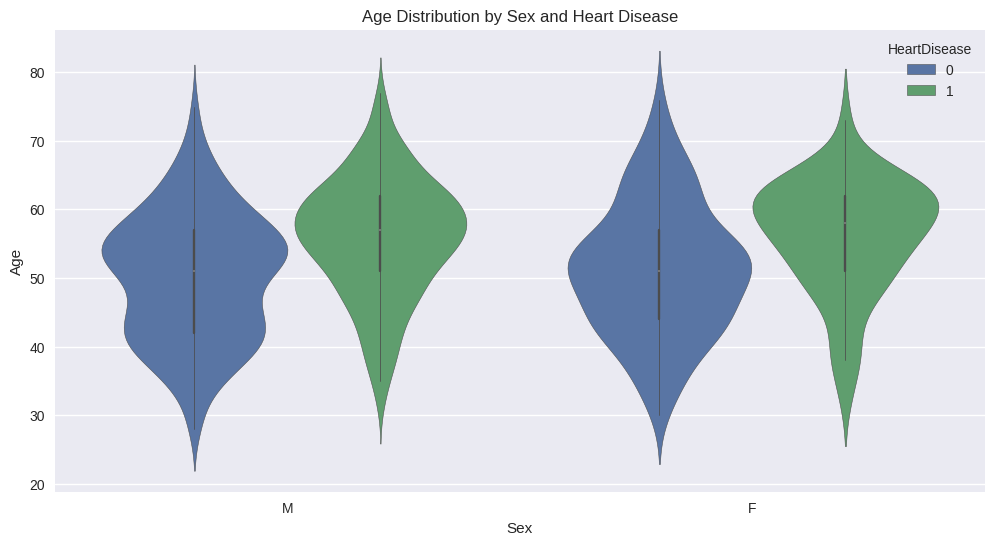

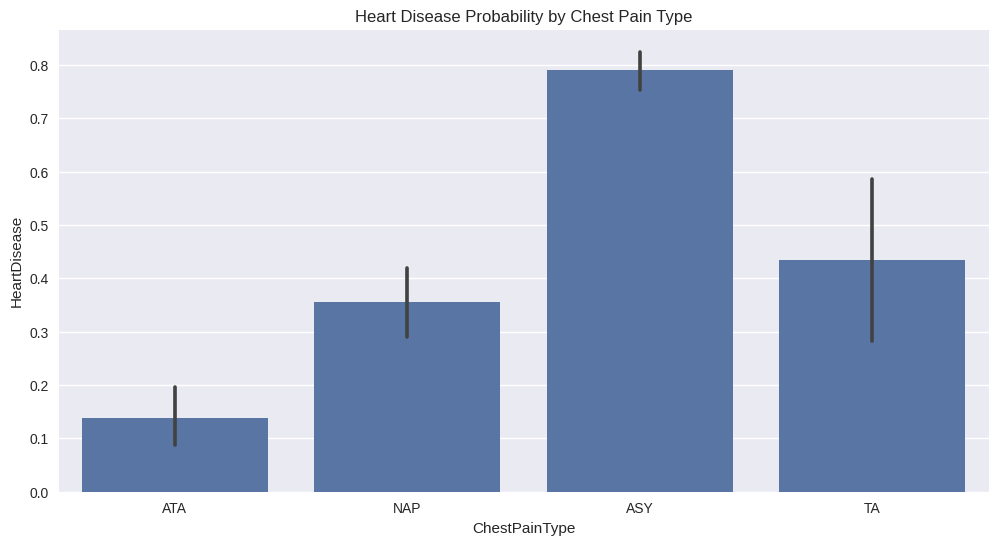

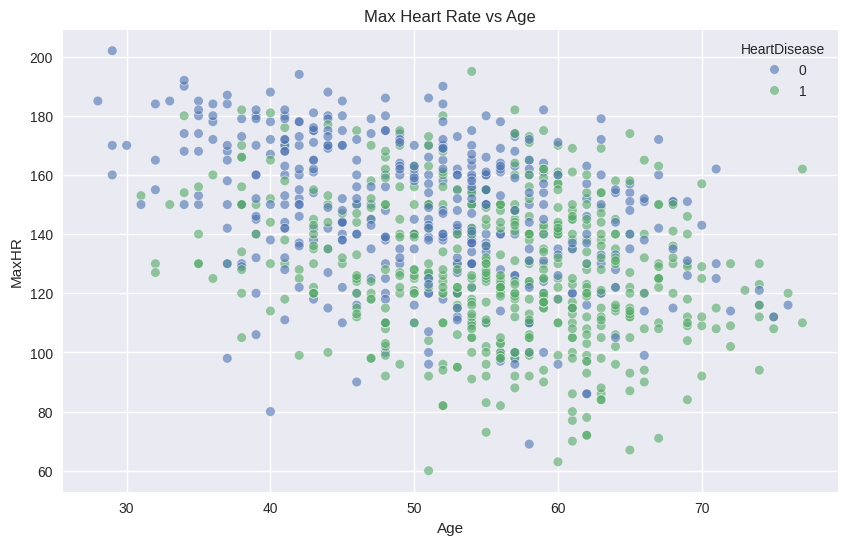

In [14]:
# 4.1 Age and Sex Analysis
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Sex', y='Age', hue='HeartDisease')
plt.title('Age Distribution by Sex and Heart Disease')
plt.show()

# 4.2 Chest Pain Type Analysis
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='ChestPainType', y='HeartDisease')
plt.title('Heart Disease Probability by Chest Pain Type')
plt.show()

# 4.3 Max Heart Rate vs Age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='MaxHR', hue='HeartDisease', alpha=0.6)
plt.title('Max Heart Rate vs Age')
plt.show()

In [15]:
# Comprehensive EDA Summary

def print_eda_summary():
    print("Key Findings from Exploratory Data Analysis:\n")

    # 1. Class Distribution Analysis
    print("1. Class Distribution:")
    print("   - Dataset is slightly imbalanced:")
    print("   - Positive cases (Heart Disease): 55.34%")
    print("   - Negative cases (No Heart Disease): 44.66%")
    print("   - This slight imbalance suggests we may not need special sampling techniques\n")

    # 2. Categorical Features Analysis
    print("2. Categorical Features Analysis:")
    print("   a. Sex Distribution:")
    print("      - Male dominated dataset (78.98%)")
    print("      - Females represent only 21.02%")
    print("      - Strong association with heart disease (chi2=84.15, p<0.001)")

    print("\n   b. Chest Pain Types:")
    print("      - ASY (Asymptomatic): 54.03% - Most common")
    print("      - NAP (Non-Anginal Pain): 22.11%")
    print("      - ATA (Atypical Angina): 18.85%")
    print("      - TA (Typical Angina): 5.01% - Least common")
    print("      - Very strong association with heart disease (chi2=268.07, p<0.001)")

    print("\n   c. Fasting Blood Sugar:")
    print("      - Normal (≤120 mg/dl): 76.69%")
    print("      - High (>120 mg/dl): 23.31%")
    print("      - Significant association with heart disease (chi2=64.32, p<0.001)")

    print("\n   d. Resting ECG:")
    print("      - Normal: 60.13%")
    print("      - LVH (Left Ventricular Hypertrophy): 20.48%")
    print("      - ST abnormality: 19.39%")
    print("      - Significant but weaker association (chi2=10.93, p=0.004)")

    print("\n   e. Exercise Angina:")
    print("      - No: 59.59%")
    print("      - Yes: 40.41%")
    print("      - Strong association with heart disease (chi2=222.26, p<0.001)")

    print("\n   f. ST Slope:")
    print("      - Flat: 50.11%")
    print("      - Up: 43.03%")
    print("      - Down: 6.86%")
    print("      - Strongest association with heart disease (chi2=355.92, p<0.001)\n")

    # 3. Data Quality
    print("3. Data Quality:")
    print("   - No missing values in the dataset")
    print("   - Outliers detected in multiple features:")
    print("     * RestingBP: 28 outliers")
    print("     * Cholesterol: 183 outliers (most significant)")
    print("     * MaxHR: 2 outliers")
    print("     * Oldpeak: 16 outliers\n")

    # 4. Feature Importance (based on chi-square values)
    print("4. Feature Importance (Categorical Variables):")
    print("   Ranked by chi-square values:")
    print("   1. ST_Slope (chi2=355.92) - Strongest predictor")
    print("   2. ChestPainType (chi2=268.07)")
    print("   3. ExerciseAngina (chi2=222.26)")
    print("   4. Sex (chi2=84.15)")
    print("   5. FastingBS (chi2=64.32)")
    print("   6. RestingECG (chi2=10.93) - Weakest predictor\n")

    # 5. Recommendations
    print("5. Recommendations for Model Development:")
    print("   a. Data Preprocessing:")
    print("      - Handle outliers in Cholesterol values carefully")
    print("      - Consider feature scaling for numerical variables")
    print("      - Encode categorical variables appropriately")

    print("\n   b. Modeling Considerations:")
    print("      - Class weights might be needed (slight imbalance)")
    print("      - Focus on features with strong associations")
    print("      - Consider feature interactions, especially with ST_Slope")

    print("\n   c. Validation Strategy:")
    print("      - Use stratified sampling to maintain class distribution")
    print("      - Consider cross-validation to ensure robust results")
    print("      - Monitor for potential overfitting due to strong predictors")

# Execute the summary
print_eda_summary()

Key Findings from Exploratory Data Analysis:

1. Class Distribution:
   - Dataset is slightly imbalanced:
   - Positive cases (Heart Disease): 55.34%
   - Negative cases (No Heart Disease): 44.66%
   - This slight imbalance suggests we may not need special sampling techniques

2. Categorical Features Analysis:
   a. Sex Distribution:
      - Male dominated dataset (78.98%)
      - Females represent only 21.02%
      - Strong association with heart disease (chi2=84.15, p<0.001)

   b. Chest Pain Types:
      - ASY (Asymptomatic): 54.03% - Most common
      - NAP (Non-Anginal Pain): 22.11%
      - ATA (Atypical Angina): 18.85%
      - TA (Typical Angina): 5.01% - Least common
      - Very strong association with heart disease (chi2=268.07, p<0.001)

   c. Fasting Blood Sugar:
      - Normal (≤120 mg/dl): 76.69%
      - High (>120 mg/dl): 23.31%
      - Significant association with heart disease (chi2=64.32, p<0.001)

   d. Resting ECG:
      - Normal: 60.13%
      - LVH (Left Ventricular

# **Handling Outlier**


Handling RestingBP outliers...


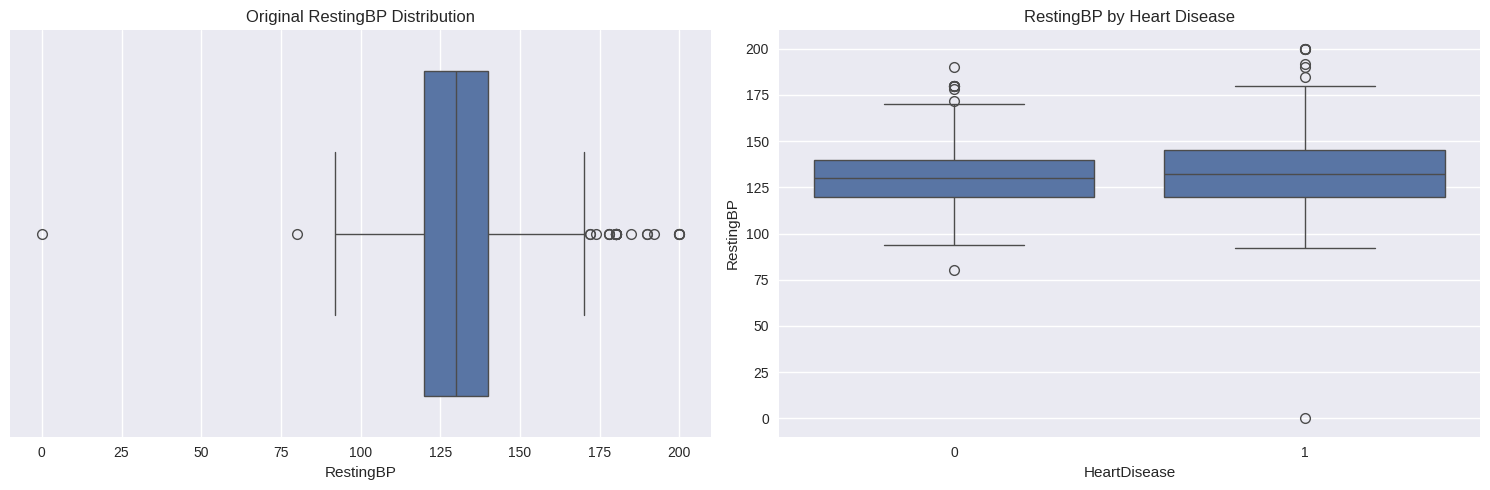


Statistical Summary for RestingBP:
count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

Outlier Boundaries for RestingBP:
Lower bound: 90.00
Upper bound: 170.00
Number of outliers: 28

Handling Cholesterol outliers...


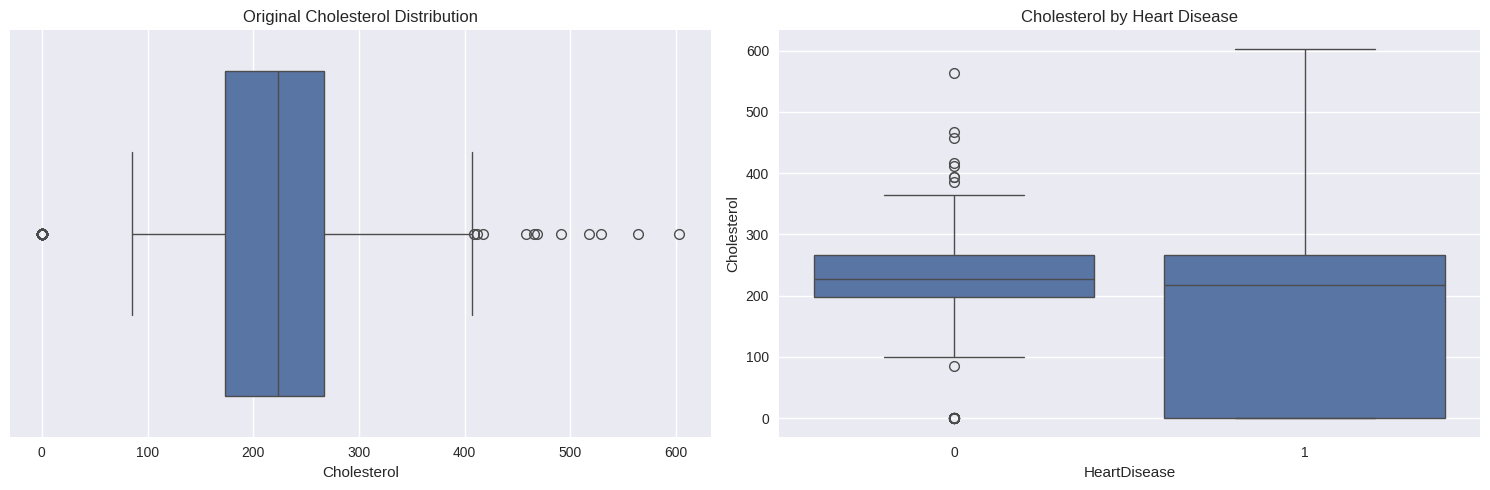


Statistical Summary for Cholesterol:
count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

Outlier Boundaries for Cholesterol:
Lower bound: 32.62
Upper bound: 407.62
Number of outliers: 183

Cholesterol imputation summary:
Used group-based imputation based on Age and Sex
High values capped at: 407.62

Handling MaxHR outliers...


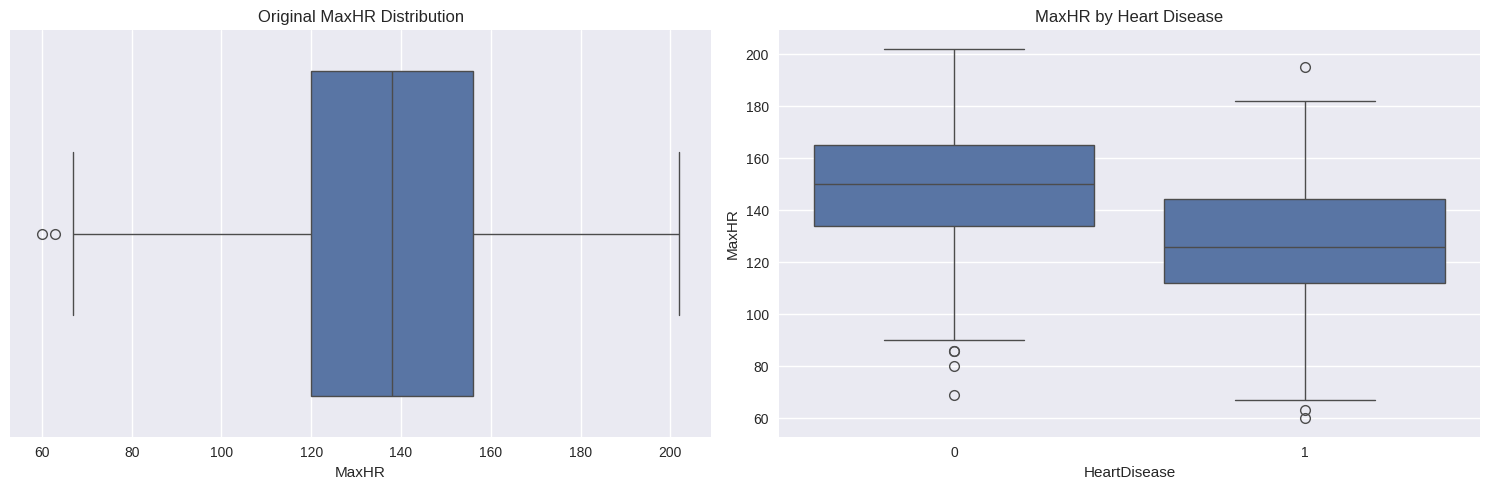


Statistical Summary for MaxHR:
count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

Outlier Boundaries for MaxHR:
Lower bound: 66.00
Upper bound: 210.00
Number of outliers: 2

Handling Oldpeak outliers...


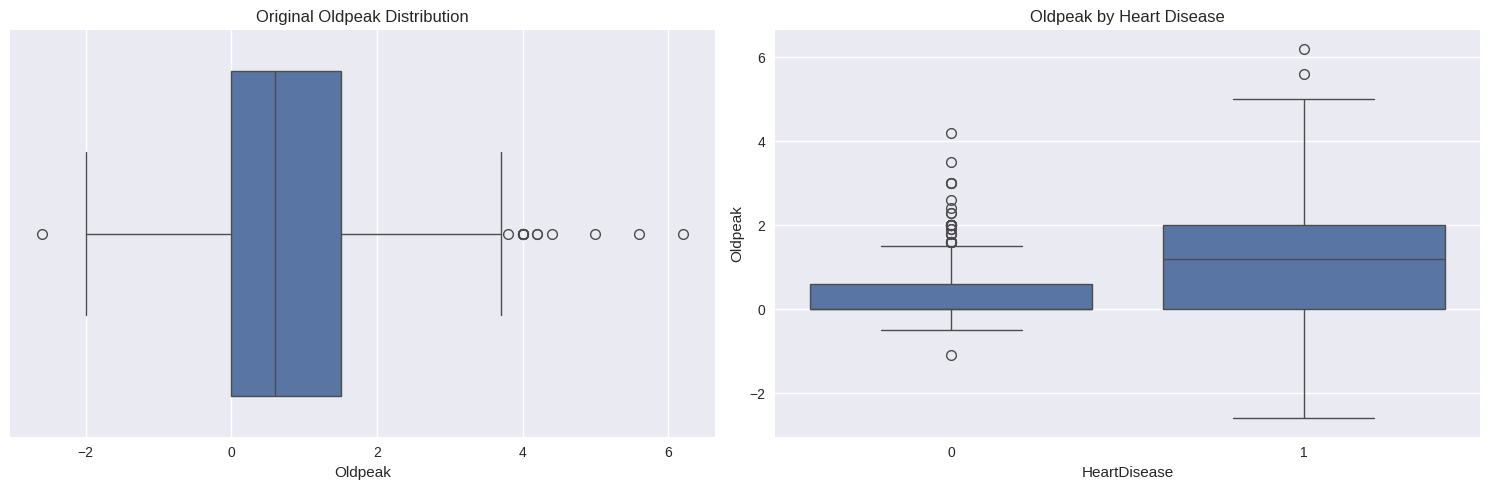


Statistical Summary for Oldpeak:
count    918.000000
mean       0.887364
std        1.066570
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

Outlier Boundaries for Oldpeak:
Lower bound: -2.25
Upper bound: 3.75
Number of outliers: 16


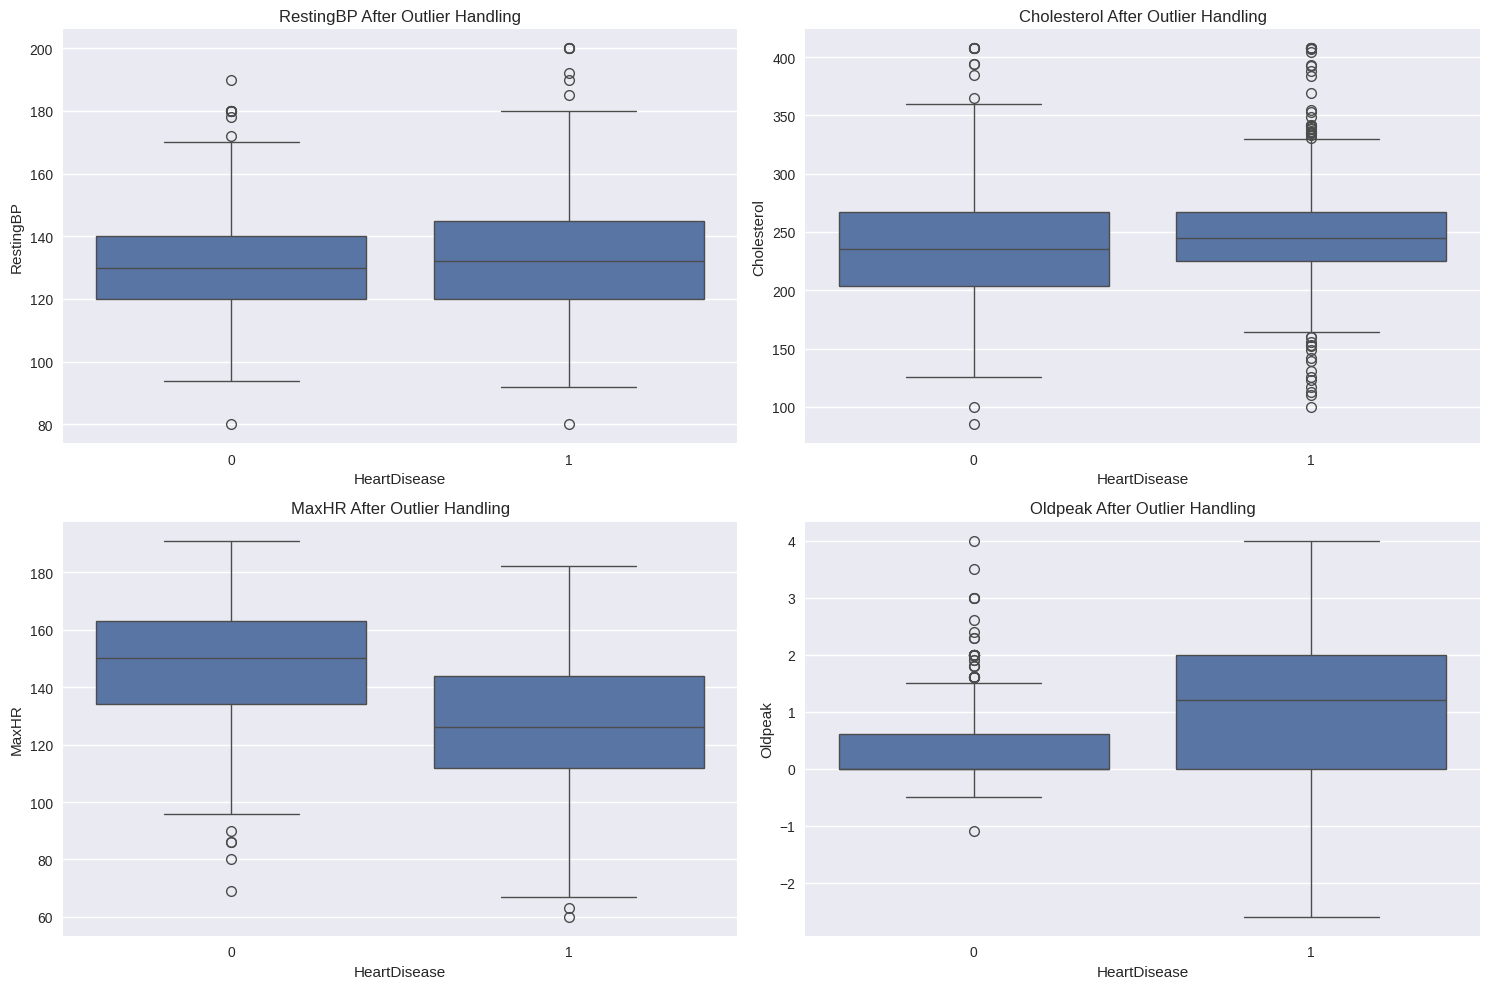


Summary statistics after handling outliers:


,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000
mean,132.483660,243.708237,136.099129,0.881264
std,18.073317,49.229957,24.486259,1.044076
min,80.000000,85.000000,60.000000,-2.600000
25%,120.000000,214.000000,120.000000,0.000000
50%,130.000000,244.635389,138.000000,0.600000
75%,140.000000,267.000000,155.000000,1.500000
max,200.000000,407.625000,191.000000,4.000000



Target variable distribution after handling outliers:


,proportion
HeartDisease,
1,0.553377
0,0.446623



Cleaned dataset has been saved as 'heart_cleaned.csv'

Original dataset shape: (918, 12)
Final dataset shape: (918, 12)


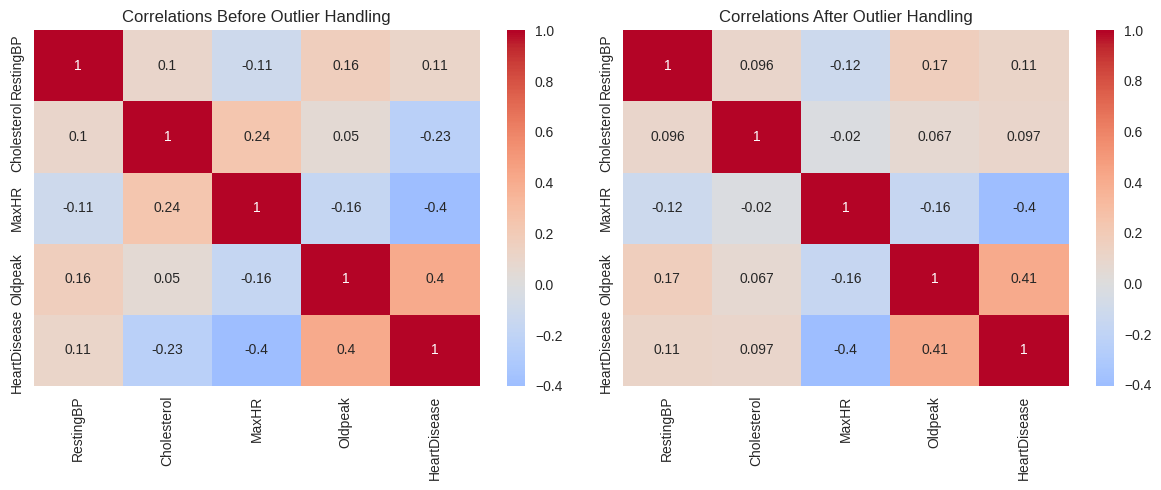

In [16]:
def analyze_and_handle_outliers(df):
    """
    Analyze and handle outliers in the dataset with specific approaches for each feature,
    now using imputation for Cholesterol zeros
    """
    data = df.copy()

    # 1. Detailed analysis of outliers (keep the same helper function)
    def plot_feature_distribution(feature):
        plt.figure(figsize=(15, 5))

        # Original distribution
        plt.subplot(121)
        sns.boxplot(data=data, x=feature)
        plt.title(f'Original {feature} Distribution')

        # Distribution by Heart Disease
        plt.subplot(122)
        sns.boxplot(data=data, x='HeartDisease', y=feature)
        plt.title(f'{feature} by Heart Disease')

        plt.tight_layout()
        plt.show()

        # Print statistical summary
        print(f"\nStatistical Summary for {feature}:")
        print(data[feature].describe())

        # Calculate outlier boundaries
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        print(f"\nOutlier Boundaries for {feature}:")
        print(f"Lower bound: {lower_bound:.2f}")
        print(f"Upper bound: {upper_bound:.2f}")
        print(f"Number of outliers: {len(data[(data[feature] < lower_bound) | (data[feature] > upper_bound)])}")

        return lower_bound, upper_bound

    # 2. Handle RestingBP outliers (28 outliers)
    print("\nHandling RestingBP outliers...")
    lower_bp, upper_bp = plot_feature_distribution('RestingBP')

    # Medical context: RestingBP below 80 is very low, above 200 is extremely high
    data.loc[data['RestingBP'] < 80, 'RestingBP'] = 80
    data.loc[data['RestingBP'] > 200, 'RestingBP'] = 200

    # 3. Handle Cholesterol outliers (183 outliers) - IMPROVED SECTION
    print("\nHandling Cholesterol outliers...")
    lower_chol, upper_chol = plot_feature_distribution('Cholesterol')

    # Calculate group means based on Age and Sex
    group_means = data[data['Cholesterol'] > 0].groupby(
        ['Sex', pd.cut(data['Age'], bins=5)])['Cholesterol'].mean()

    # Group-based imputation for zeros
    for idx in data[data['Cholesterol'] == 0].index:
        sex = data.loc[idx, 'Sex']
        age_group = pd.cut([data.loc[idx, 'Age']], bins=5)[0]
        try:
            group_mean = group_means[sex, age_group]
            data.loc[idx, 'Cholesterol'] = group_mean
        except:
            # Fallback to overall mean if group is empty
            data.loc[idx, 'Cholesterol'] = data[data['Cholesterol'] > 0]['Cholesterol'].mean()

    # Handle high outliers
    data.loc[data['Cholesterol'] > upper_chol, 'Cholesterol'] = upper_chol

    print(f"\nCholesterol imputation summary:")
    print("Used group-based imputation based on Age and Sex")
    print(f"High values capped at: {upper_chol:.2f}")

    # 4. Handle MaxHR outliers (2 outliers)
    print("\nHandling MaxHR outliers...")
    lower_hr, upper_hr = plot_feature_distribution('MaxHR')

    # Medical context: MaxHR has a theoretical maximum based on age
    theoretical_max_hr = 220 - data['Age']
    data.loc[data['MaxHR'] > theoretical_max_hr, 'MaxHR'] = theoretical_max_hr

    # 5. Handle Oldpeak outliers (16 outliers)
    print("\nHandling Oldpeak outliers...")
    lower_op, upper_op = plot_feature_distribution('Oldpeak')

    # Cap Oldpeak at 99th percentile
    oldpeak_99 = data['Oldpeak'].quantile(0.99)
    data.loc[data['Oldpeak'] > oldpeak_99, 'Oldpeak'] = oldpeak_99

    # 6. Visualize the results after handling outliers
    numerical_features = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
    plt.figure(figsize=(15, 10))

    for i, feature in enumerate(numerical_features, 1):
        plt.subplot(2, 2, i)
        sns.boxplot(data=data, x='HeartDisease', y=feature)
        plt.title(f'{feature} After Outlier Handling')

    plt.tight_layout()
    plt.show()

    # 7. Print summary statistics after handling outliers
    print("\nSummary statistics after handling outliers:")
    display(data[numerical_features].describe())

    # 8. Check the impact on target variable distribution
    print("\nTarget variable distribution after handling outliers:")
    display(data['HeartDisease'].value_counts(normalize=True))

    return data

# Execute the modified outlier handling
df_cleaned = analyze_and_handle_outliers(df)

# Save the cleaned dataset
df_cleaned.to_csv('heart_cleaned.csv', index=False)
print("\nCleaned dataset has been saved as 'heart_cleaned.csv'")

# Display the changes in dataset size
print("\nOriginal dataset shape:", df.shape)
print("Final dataset shape:", df_cleaned.shape)

# Check correlation changes
plt.figure(figsize=(12, 5))

# Original correlations
plt.subplot(121)
sns.heatmap(df[['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']].corr(),
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlations Before Outlier Handling')

# New correlations
plt.subplot(122)
sns.heatmap(df_cleaned[['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']].corr(),
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlations After Outlier Handling')

plt.tight_layout()
plt.show()

# **Preprocessing and Modeling**

In [17]:
# Load the cleaned dataset
df_cleaned = pd.read_csv('heart_cleaned.csv')

# Data Preprocessing
def preprocess_data(df):
    """
    Preprocess the cleaned dataset for modeling
    """
    # Create a copy of the dataframe
    data = df.copy()

    # Encode categorical variables
    categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

    le_dict = {}
    for feature in categorical_features:
        le = LabelEncoder()
        data[feature] = le.fit_transform(data[feature])
        le_dict[feature] = le

    # Scale numerical features
    numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
    scaler = StandardScaler()
    data[numerical_features] = scaler.fit_transform(data[numerical_features])

    return data, le_dict, scaler

In [18]:
# Preprocess the cleaned data
processed_df, le_dict, scaler = preprocess_data(df_cleaned)

# Split the data
X = processed_df.drop('HeartDisease', axis=1)
y = processed_df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (734, 11)
Testing set shape: (184, 11)


In [19]:
# Model Training and Evaluation
def train_and_evaluate_models():
    # Initialize models
    models = {
        'Random Forest': RandomForestClassifier(random_state=42),
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Naive Bayes': GaussianNB(),
        'SVM': SVC(probability=True, random_state=42)
    }

    # Store results
    results = {}

    # Train and evaluate each model
    for name, model in models.items():
        print(f"\nTraining and evaluating {name}...")

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        # Calculate metrics
        metrics = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1 Score': f1_score(y_test, y_pred)
        }

        # Confusion Matrix
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {name}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc='lower right')
        plt.show()

        metrics['AUC'] = roc_auc
        results[name] = metrics

        # For Random Forest and Decision Tree, show feature importance
        if name in ['Random Forest', 'Decision Tree']:
            feature_importance = pd.DataFrame({
                'Feature': X.columns,
                'Importance': model.feature_importances_
            }).sort_values('Importance', ascending=False)

            plt.figure(figsize=(10, 6))
            sns.barplot(data=feature_importance, x='Importance', y='Feature')
            plt.title(f'Feature Importance - {name}')
            plt.show()

    return results, models



Training and evaluating Random Forest...


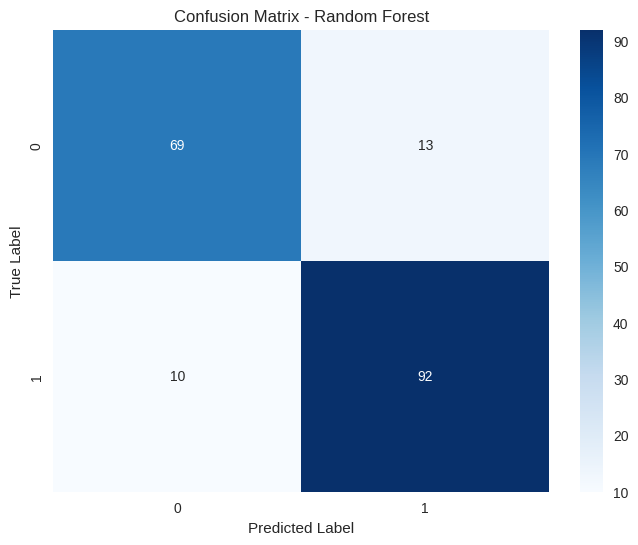

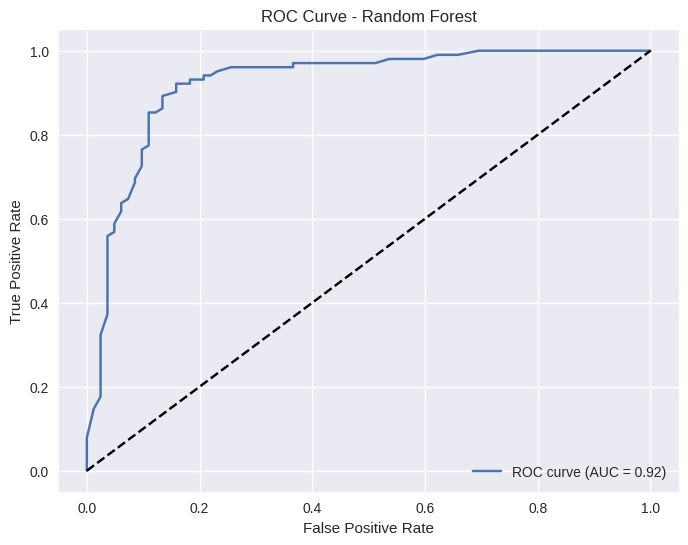

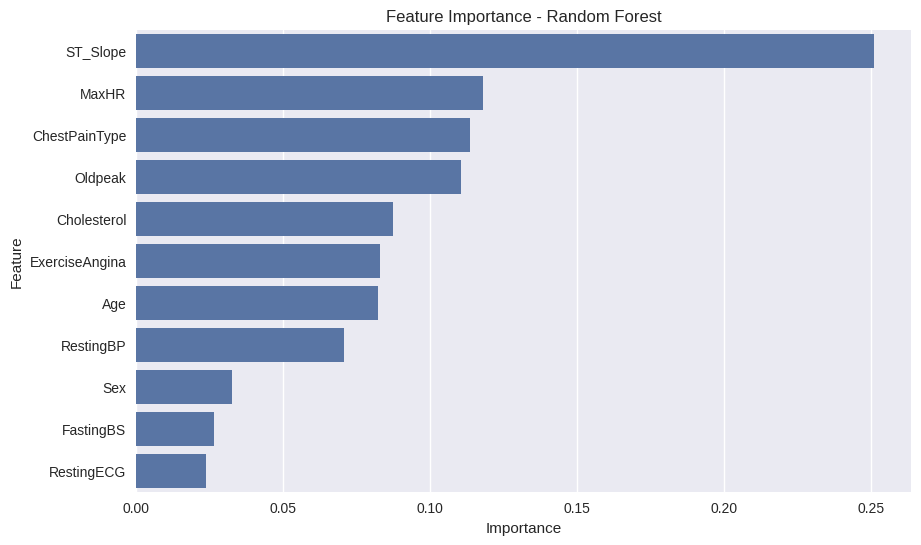


Training and evaluating KNN...


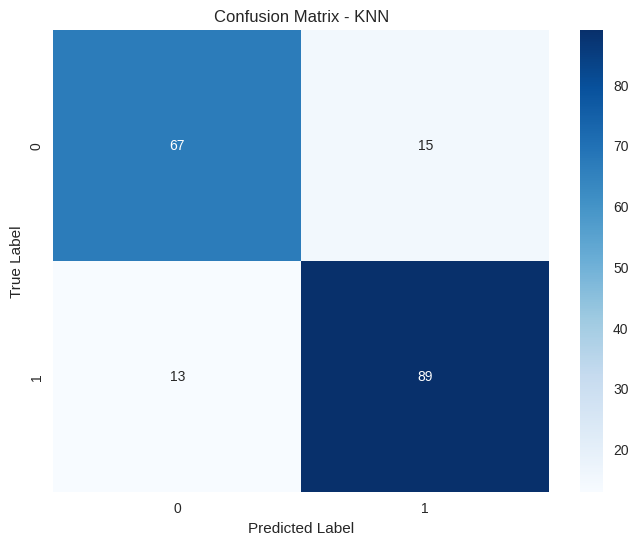

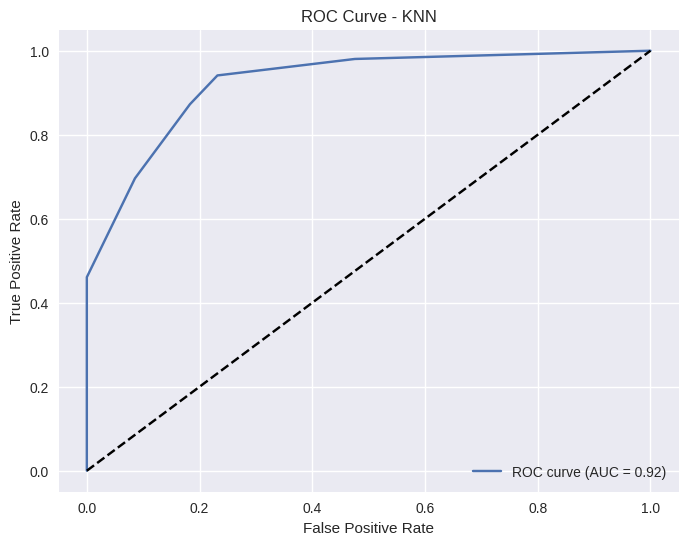


Training and evaluating Decision Tree...


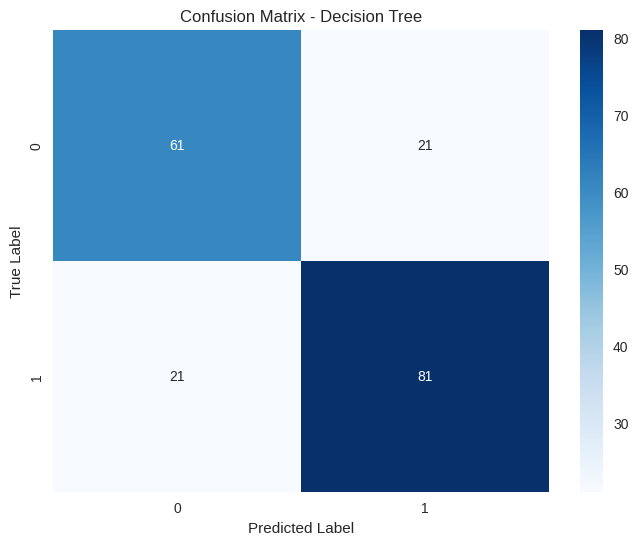

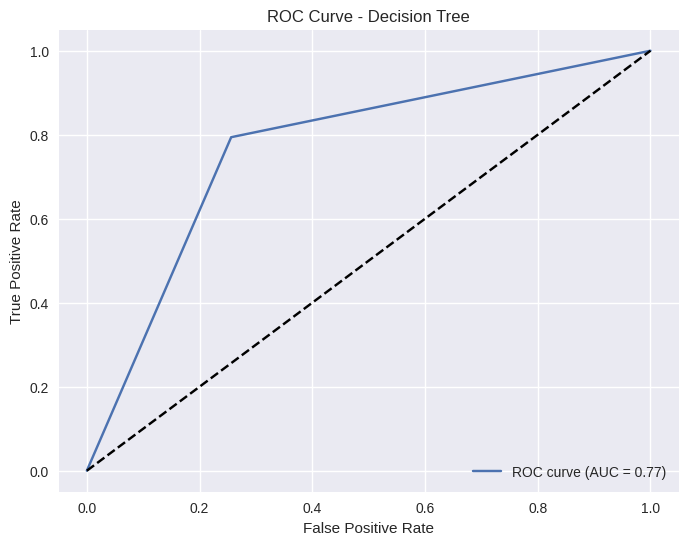

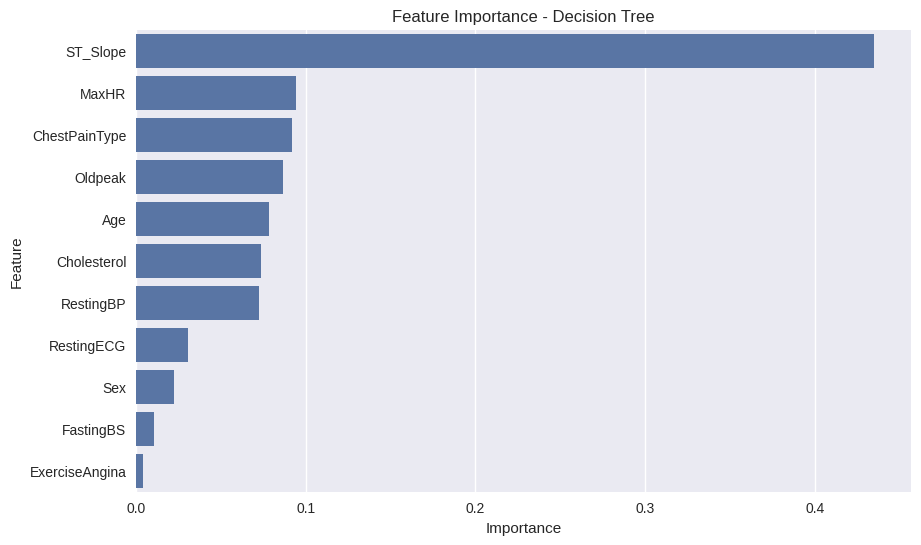


Training and evaluating Naive Bayes...


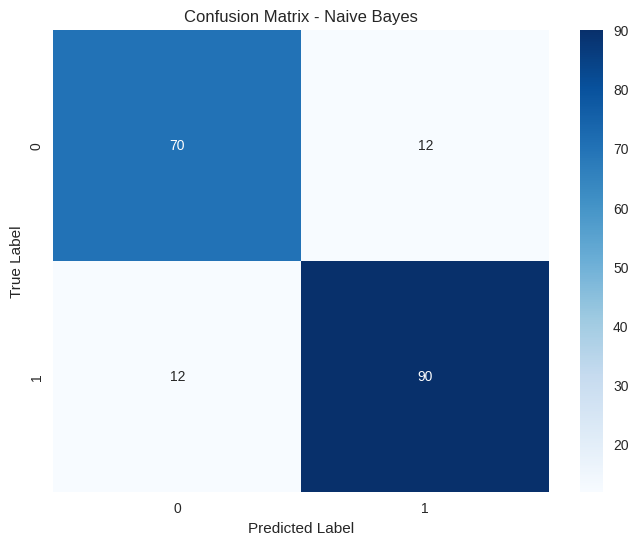

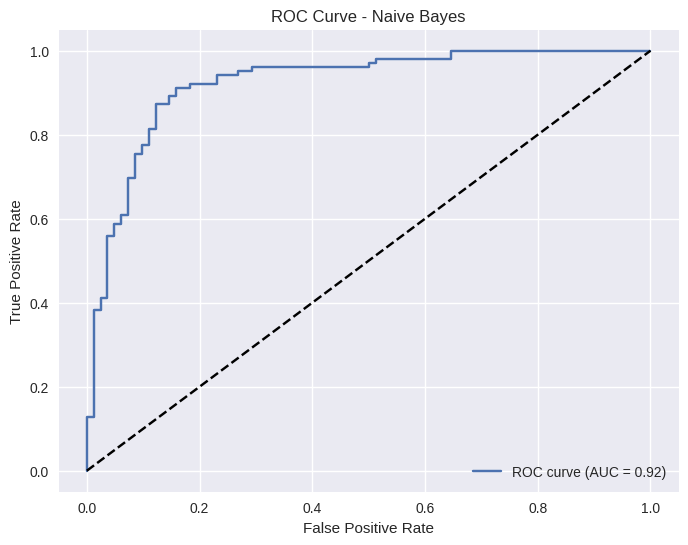


Training and evaluating SVM...


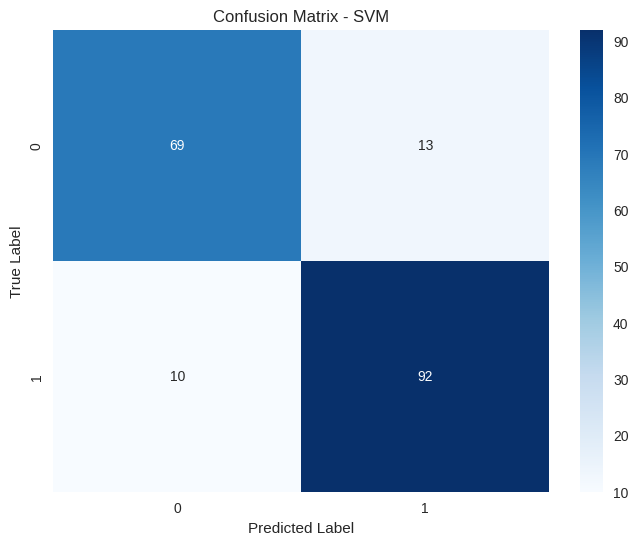

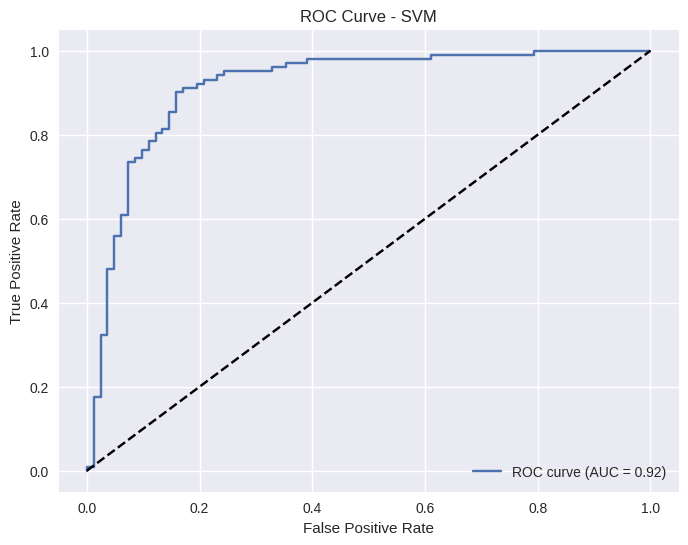


Model Performance Comparison:


,Accuracy,Precision,Recall,F1 Score,AUC
Random Forest,0.875000,0.876190,0.901961,0.888889,0.922704
KNN,0.847826,0.855769,0.872549,0.864078,0.923721
Decision Tree,0.771739,0.794118,0.794118,0.794118,0.769010
Naive Bayes,0.869565,0.882353,0.882353,0.882353,0.922884
SVM,0.875000,0.876190,0.901961,0.888889,0.915830


In [20]:
# Train and evaluate models
results, models = train_and_evaluate_models()

# Display results in a DataFrame
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
display(results_df)

<Figure size 1200x600 with 0 Axes>

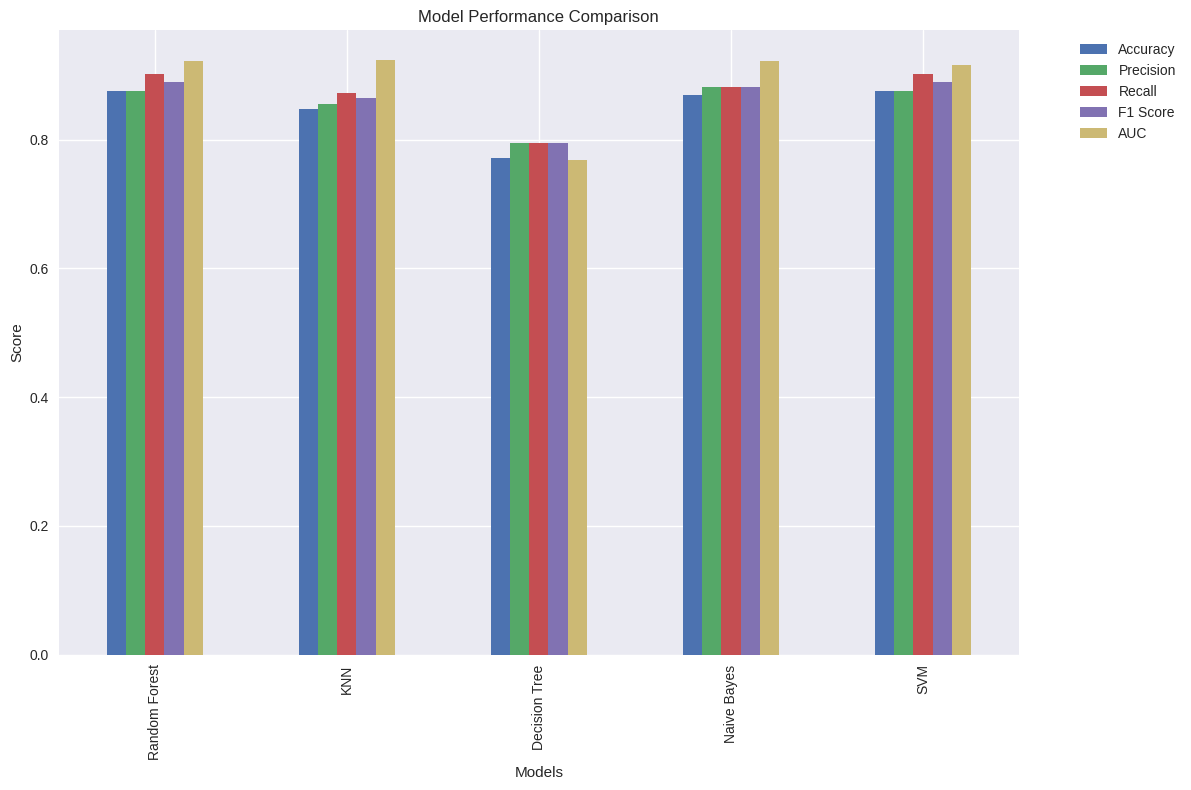

In [21]:
# Plot model comparison
plt.figure(figsize=(12, 6))
results_df.plot(kind='bar')
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

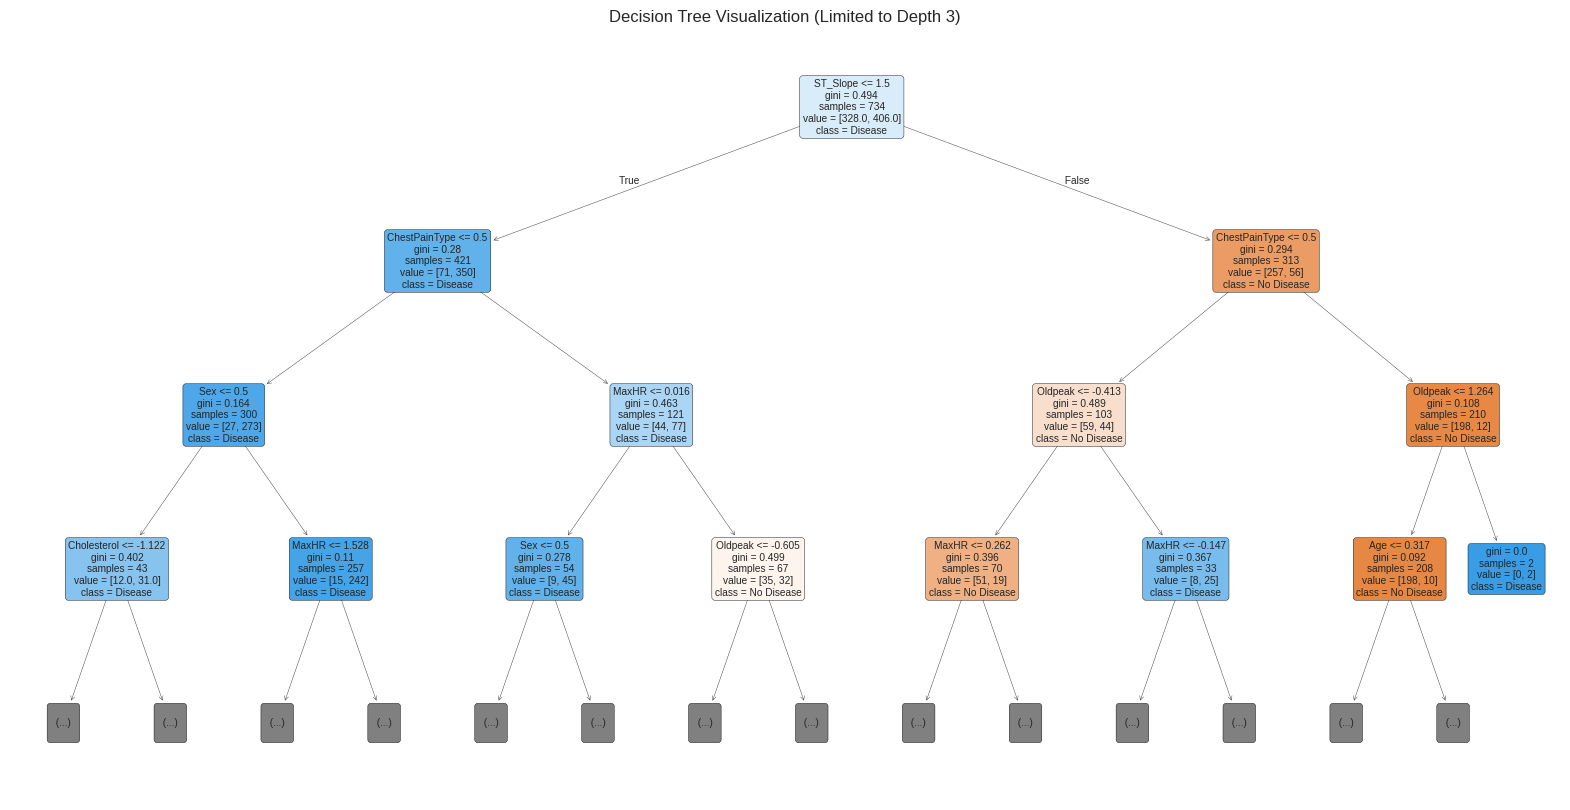

In [22]:
# Visualize Decision Tree (limited depth for clarity)
plt.figure(figsize=(20, 10))
plot_tree(models['Decision Tree'],
         feature_names=X.columns,
         class_names=['No Disease', 'Disease'],
         filled=True,
         rounded=True,
         max_depth=3)
plt.title('Decision Tree Visualization (Limited to Depth 3)')
plt.show()

In [23]:
# Save models and results
import joblib
import os

# Create a folder for models in Google Drive
models_folder = '/content/heart_failure_models'
#!mkdir -p {models_folder}
os.makedirs(models_folder, exist_ok=True)

# Save each model
for name, model in models.items():
    filename = f"{models_folder}/{name.lower().replace(' ', '_')}.joblib"
    joblib.dump(model, filename)
    print(f"Saved {name} to {filename}")

# Save results to CSV
results_df.to_csv(f"{models_folder}/model_results.csv")
print("\nResults saved to model_results.csv")

Saved Random Forest to /content/heart_failure_models/random_forest.joblib
Saved KNN to /content/heart_failure_models/knn.joblib
Saved Decision Tree to /content/heart_failure_models/decision_tree.joblib
Saved Naive Bayes to /content/heart_failure_models/naive_bayes.joblib
Saved SVM to /content/heart_failure_models/svm.joblib

Results saved to model_results.csv


In [24]:
# Print final summary
print("\nModel Training and Evaluation Summary:")
print("----------------------------------------")
print(f"Total samples in cleaned dataset: {len(df_cleaned)}")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print("\nBest performing model:")
best_model = results_df['Accuracy'].idxmax()
print(f"- {best_model} (Accuracy: {results_df.loc[best_model, 'Accuracy']:.4f})")
print("\nFeature ranking (based on Random Forest importance):")
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': models['Random Forest'].feature_importances_
}).sort_values('Importance', ascending=False)
print(feature_importance)


Model Training and Evaluation Summary:
----------------------------------------
Total samples in cleaned dataset: 918
Training samples: 734
Testing samples: 184

Best performing model:
- Random Forest (Accuracy: 0.8750)

Feature ranking (based on Random Forest importance):
           Feature  Importance
10        ST_Slope    0.251232
7            MaxHR    0.117978
2    ChestPainType    0.113629
9          Oldpeak    0.110638
4      Cholesterol    0.087300
8   ExerciseAngina    0.083145
0              Age    0.082311
3        RestingBP    0.070622
1              Sex    0.032794
5        FastingBS    0.026513
6       RestingECG    0.023838


In [25]:
models_results = pd.read_csv("/content/heart_failure_models/model_results.csv")
models_results.head()

,Unnamed: 0,Accuracy,Precision,Recall,F1 Score,AUC
0,Random Forest,0.875000,0.876190,0.901961,0.888889,0.922704
1,KNN,0.847826,0.855769,0.872549,0.864078,0.923721
2,Decision Tree,0.771739,0.794118,0.794118,0.794118,0.769010
3,Naive Bayes,0.869565,0.882353,0.882353,0.882353,0.922884
4,SVM,0.875000,0.876190,0.901961,0.888889,0.915830


# **Advanced Boosting Models and Stacking**

In [26]:
!pip install -q catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.4 MB/s eta 0:00:00


In [27]:
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
# Suppress specific LightGBM warnings and infos
import logging
logging.getLogger('lightgbm').setLevel(logging.ERROR)

# Set pandas display options to suppress warnings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

# Configure logging for XGBoost
xgb.set_config(verbosity=0)


In [30]:
# Set sklearn warnings
def ignore_warn(*args, **kwargs):
    pass
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

def train_lightgbm(X_train, X_test, y_train, y_test):
    """Train and evaluate LightGBM model with suppressed output"""
    # Define parameter grid
    param_grid = {
        'num_leaves': [31, 63],
        'max_depth': [4, 6],
        'learning_rate': [0.01, 0.1],
        'n_estimators': [100, 200],
        'subsample': [0.8, 0.9],
        'colsample_bytree': [0.8, 0.9]
    }

    # Create and tune model with verbose disabled
    lgb_model = lgb.LGBMClassifier(
        random_state=42,
        verbose=-1,  # Disable verbose output
        silent=True  # Suppress stdout output
    )

    # Configure grid search to be quiet
    grid_search = GridSearchCV(
        lgb_model,
        param_grid,
        cv=5,
        scoring='accuracy',
        verbose=0  # Disable verbose output
    )

    # Suppress output during fitting
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        grid_search.fit(
            X_train,
            y_train,
            verbose=False  # Disable verbose output
        )

    return grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_


In [31]:
def preprocess_data(df):
    """Preprocess data with encoding and scaling"""
    data = df.copy()

    # Encode categorical variables
    categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
    for feature in categorical_features:
        le = LabelEncoder()
        data[feature] = le.fit_transform(data[feature])

    # Scale numerical features
    numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
    scaler = StandardScaler()
    data[numerical_features] = scaler.fit_transform(data[numerical_features])

    return data


In [32]:
def train_lightgbm(X_train, X_test, y_train, y_test):
    """Train and evaluate LightGBM model"""
    param_grid = {
        'num_leaves': [31, 63],
        'max_depth': [4, 6],
        'learning_rate': [0.01, 0.1],
        'n_estimators': [100, 200],
        'subsample': [0.8, 0.9],
        'colsample_bytree': [0.8, 0.9]
    }

    lgb_model = lgb.LGBMClassifier(
        random_state=42,
        verbose=-1,
        silent=True
    )

    grid_search = GridSearchCV(
        lgb_model,
        param_grid,
        cv=5,
        scoring='accuracy',
        verbose=0
    )

    grid_search.fit(X_train, y_train)

    return grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_


In [33]:
def train_xgboost(X_train, X_test, y_train, y_test):
    """Train and evaluate XGBoost model"""
    param_grid = {
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200, 300],
        'min_child_weight': [1, 2, 3],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }

    xgb_model = xgb.XGBClassifier(
        objective='binary:logistic',
        random_state=42,
        use_label_encoder=False,
        verbosity=0
    )

    grid_search = GridSearchCV(
        xgb_model,
        param_grid,
        cv=5,
        scoring='accuracy',
        verbose=0
    )

    grid_search.fit(X_train, y_train)

    return grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_


In [34]:
def train_catboost(X_train, X_test, y_train, y_test):
    """Train and evaluate CatBoost model"""
    param_grid = {
        'depth': [4, 6],
        'learning_rate': [0.01, 0.1],
        'iterations': [100, 200],
        'l2_leaf_reg': [1, 3],
        'subsample': [0.8, 0.9]
    }

    # Use only logging_level parameter for verbosity control
    cat_model = CatBoostClassifier(
        random_state=42,
        logging_level='Silent'  # Only use this parameter for controlling output
    )

    grid_search = GridSearchCV(
        cat_model,
        param_grid,
        cv=5,
        scoring='accuracy',
        verbose=0
    )

    grid_search.fit(X_train, y_train)

    return grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_



In [35]:
def evaluate_model(model, X_test, y_test, model_name):
    """Evaluate model performance"""
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return metrics

In [36]:
def main():
    # Load and preprocess data
    print("Loading and preprocessing data...")
    df = pd.read_csv('heart_cleaned.csv')
    data_processed = preprocess_data(df)

    # Split features and target
    X = data_processed.drop('HeartDisease', axis=1)
    y = data_processed['HeartDisease']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Train models
    print("\nTraining XGBoost (this may take a few minutes)...")
    xgb_model, xgb_params, xgb_score = train_xgboost(X_train, X_test, y_train, y_test)
    print(f"Best XGBoost Score: {xgb_score:.4f}")
    print("XGBoost Best Parameters:", xgb_params)

    print("\nTraining LightGBM (this may take a few minutes)...")
    lgb_model, lgb_params, lgb_score = train_lightgbm(X_train, X_test, y_train, y_test)
    print(f"Best LightGBM Score: {lgb_score:.4f}")
    print("LightGBM Best Parameters:", lgb_params)

    print("\nTraining CatBoost (this may take a few minutes)...")
    cat_model, cat_params, cat_score = train_catboost(X_train, X_test, y_train, y_test)
    print(f"Best CatBoost Score: {cat_score:.4f}")
    print("CatBoost Best Parameters:", cat_params)

    # Evaluate models
    models = {
        'XGBoost': xgb_model,
        'LightGBM': lgb_model,
        'CatBoost': cat_model
    }

    # Store results
    results = {}
    print("\nEvaluating final models on test set...")
    for name, model in models.items():
        print(f"\nEvaluating {name}...")
        metrics = evaluate_model(model, X_test, y_test, name)
        results[name] = metrics

    # Display results
    print("\nFinal Results:")
    results_df = pd.DataFrame(results).round(4)
    print(results_df)

    # Plot comparison
    plt.figure(figsize=(12, 6))
    results_df.plot(kind='bar')
    plt.title('Model Performance Comparison')
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

Loading and preprocessing data...

Training XGBoost (this may take a few minutes)...
Best XGBoost Score: 0.8678
XGBoost Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}

Training LightGBM (this may take a few minutes)...
Best LightGBM Score: 0.8528
LightGBM Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'num_leaves': 31, 'subsample': 0.8}

Training CatBoost (this may take a few minutes)...
Best CatBoost Score: 0.8665
CatBoost Best Parameters: {'depth': 4, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.1, 'subsample': 0.8}

Evaluating final models on test set...

Evaluating XGBoost...


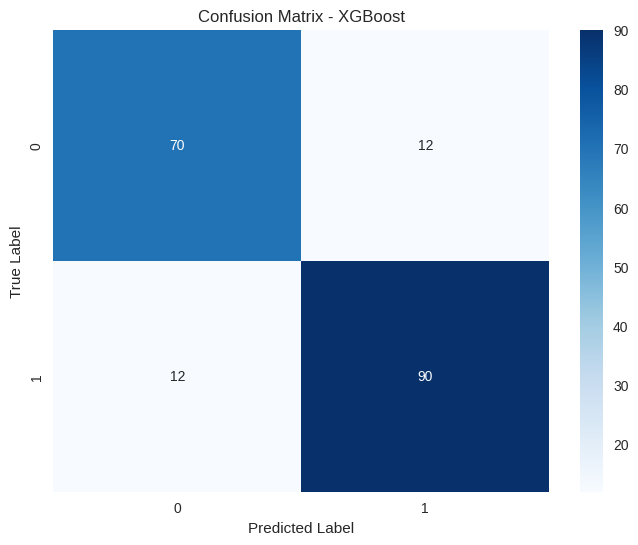


Evaluating LightGBM...


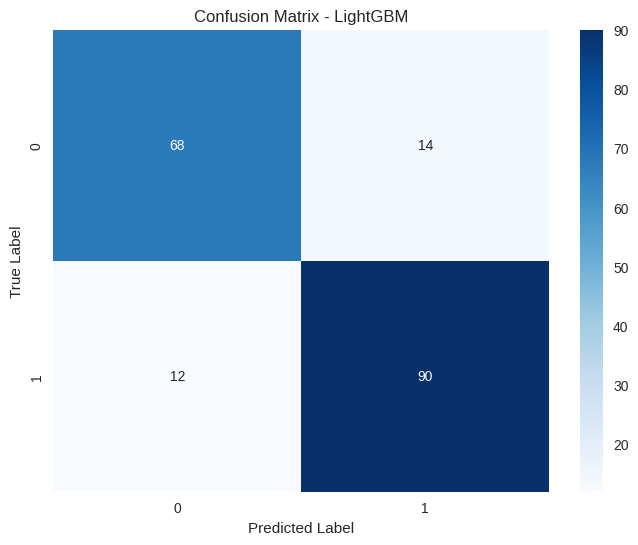


Evaluating CatBoost...


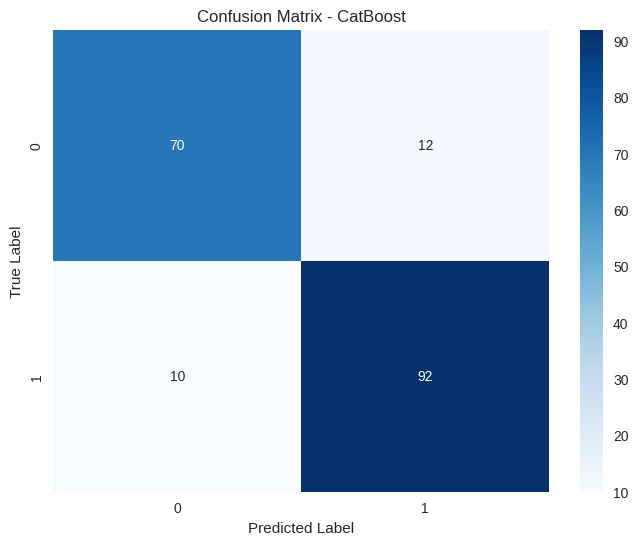


Final Results:
           XGBoost  LightGBM  CatBoost
Accuracy    0.8696    0.8587    0.8804
Precision   0.8824    0.8654    0.8846
Recall      0.8824    0.8824    0.9020
F1 Score    0.8824    0.8738    0.8932


<Figure size 1200x600 with 0 Axes>

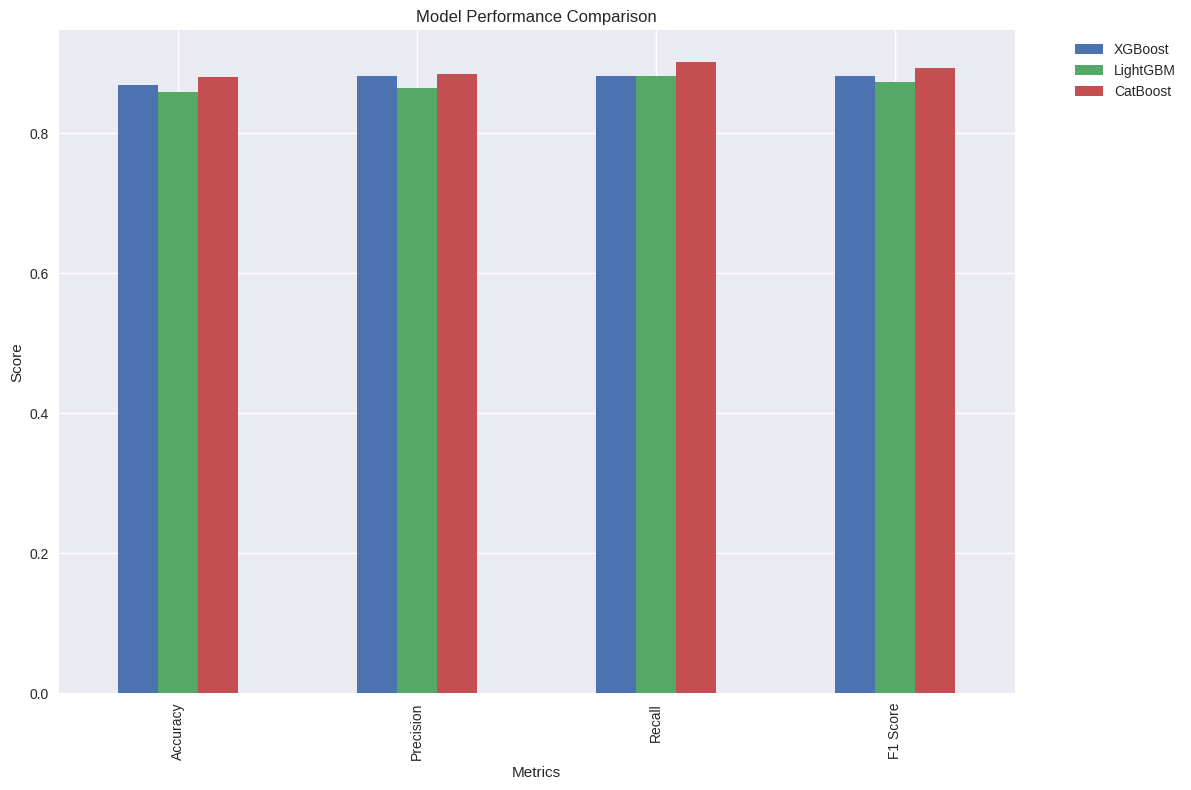

In [37]:
if __name__ == "__main__":
    main()

# **Neural Network**

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [39]:
def create_model(input_dim):
    """Create neural network model"""
    model = Sequential([
        # First hidden layer
        Dense(64, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(0.3),

        # Second hidden layer
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        # Third hidden layer
        Dense(16, activation='relu'),
        BatchNormalization(),
        Dropout(0.1),

        # Output layer
        Dense(1, activation='sigmoid')
    ])

    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [40]:
def train_neural_network(X_train, X_test, y_train, y_test):
    """Train and evaluate neural network model"""
    # Create callbacks
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=20,
        restore_best_weights=True,
        verbose=0
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=0.00001,
        verbose=0
    )

    # Create model
    model = create_model(X_train.shape[1])

    # Train model
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=200,
        batch_size=32,
        callbacks=[early_stopping, reduce_lr],
        verbose=0
    )

    return model, history


In [41]:
def evaluate_neural_network(model, history, X_test, y_test):
    """Evaluate neural network performance"""
    # Make predictions
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    y_pred_proba = model.predict(X_test)

    # Calculate metrics
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

    # Plot training history
    plt.figure(figsize=(12, 4))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - Neural Network')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return metrics

In [44]:
def main():
    # Set random seeds for reproducibility
    np.random.seed(42)
    tf.random.set_seed(42)

    # Load and preprocess data
    print("Loading and preprocessing data...")
    df = pd.read_csv('heart_cleaned.csv')
    data_processed = preprocess_data(df)

    # Split features and target
    X = data_processed.drop('HeartDisease', axis=1)
    y = data_processed['HeartDisease']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Train neural network
    print("\nTraining Neural Network...")
    model, history = train_neural_network(X_train, X_test, y_train, y_test)

    # Evaluate model
    print("\nEvaluating Neural Network...")
    metrics = evaluate_neural_network(model, history, X_test, y_test)

    # Display results
    print("\nNeural Network Results:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

    # Compare with previous models
    previous_results = {
        'XGBoost': {'Accuracy': 0.8696, 'Precision': 0.8824, 'Recall': 0.8824, 'F1 Score': 0.8824},
        'LightGBM': {'Accuracy': 0.8587, 'Precision': 0.8654, 'Recall': 0.8824, 'F1 Score': 0.8738},
        'CatBoost': {'Accuracy': 0.8804, 'Precision': 0.8846, 'Recall': 0.9020, 'F1 Score': 0.8932},
        'Neural Network': metrics
    }

    # Create comparison DataFrame
    results_df = pd.DataFrame(previous_results).round(4)

    print("\nAll Models Comparison:")
    print(results_df)

    # Plot comparison
    plt.figure(figsize=(12, 6))
    results_df.plot(kind='bar')
    plt.title('Model Performance Comparison')
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

Loading and preprocessing data...

Training Neural Network...

Evaluating Neural Network...
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


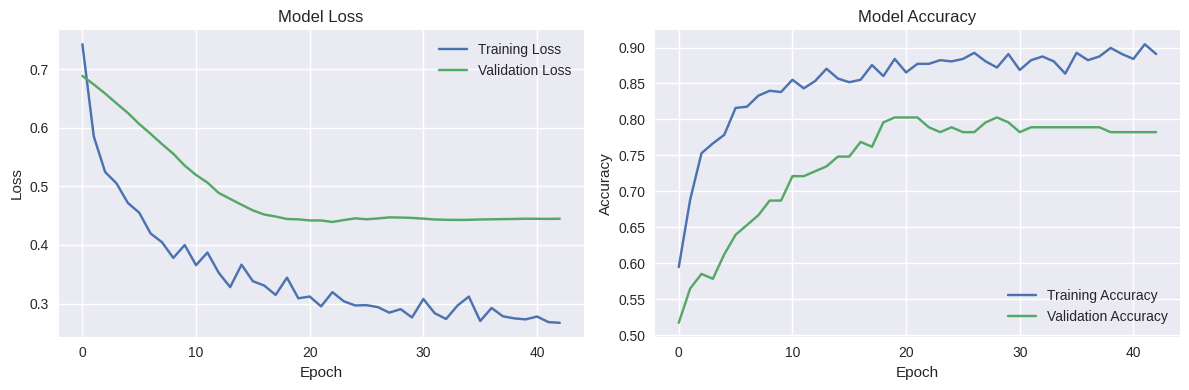

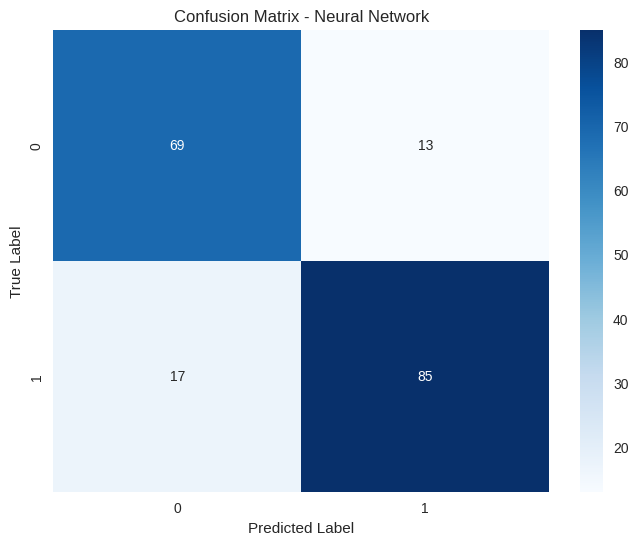


Neural Network Results:
Accuracy: 0.8370
Precision: 0.8673
Recall: 0.8333
F1 Score: 0.8500

All Models Comparison:
           XGBoost  LightGBM  CatBoost  Neural Network
Accuracy    0.8696    0.8587    0.8804          0.8370
Precision   0.8824    0.8654    0.8846          0.8673
Recall      0.8824    0.8824    0.9020          0.8333
F1 Score    0.8824    0.8738    0.8932          0.8500


<Figure size 1200x600 with 0 Axes>

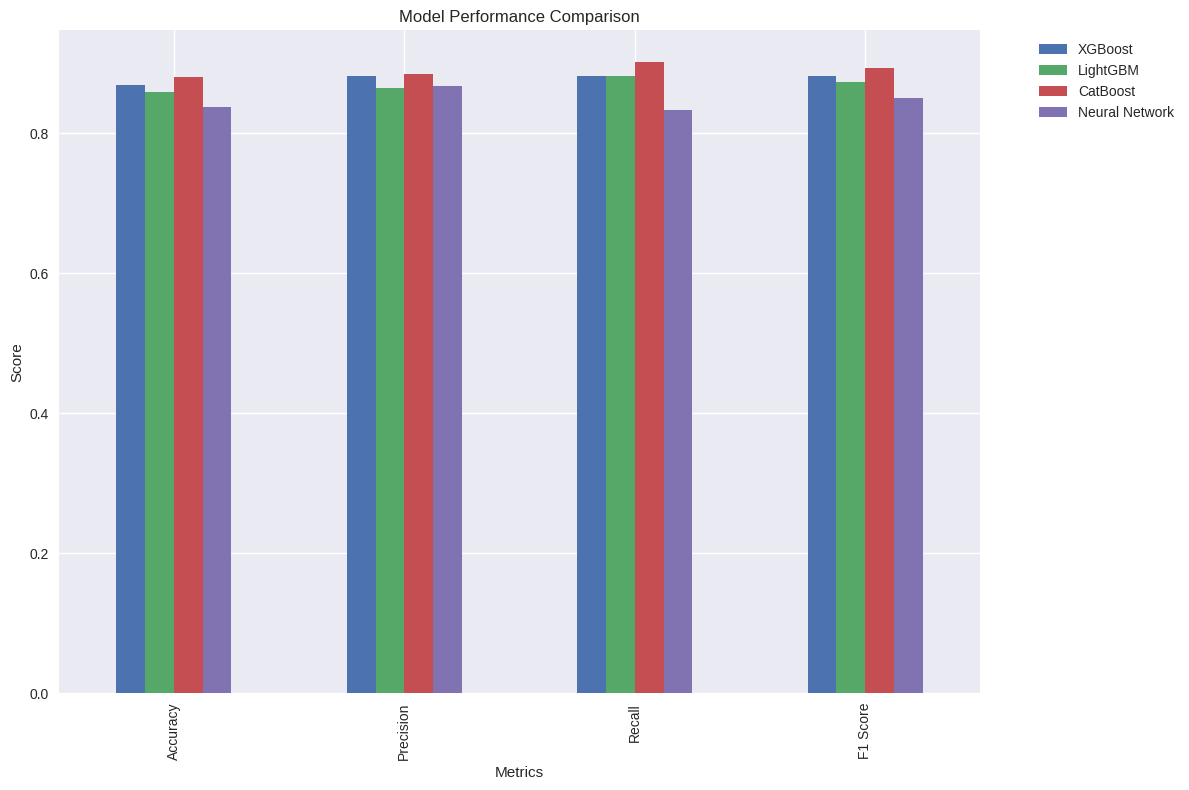

In [45]:
if __name__ == "__main__":
    main()

# **Optimized Model**

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
import warnings
import logging
from catboost import CatBoostClassifier
import xgboost as xgb
import lightgbm as lgb


In [47]:
# Suppress warnings and logging
warnings.filterwarnings('ignore')
logging.getLogger('catboost').setLevel(logging.ERROR)
logging.getLogger('xgboost').setLevel(logging.ERROR)
logging.getLogger('lightgbm').setLevel(logging.ERROR)

In [48]:
def preprocess_with_feature_engineering(df):
    """Preprocess data with feature engineering based on analysis"""
    data = df.copy()

    # Encode categorical variables
    categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
    for feature in categorical_features:
        le = LabelEncoder()
        data[feature] = le.fit_transform(data[feature])

    # Create interaction features based on top correlations
    data['ST_Slope_ExerciseAngina'] = data['ST_Slope'] * data['ExerciseAngina']
    data['ST_Slope_Oldpeak'] = data['ST_Slope'] * data['Oldpeak']
    data['Age_MaxHR'] = data['Age'] * data['MaxHR']
    data['ChestPain_ExerciseAngina'] = data['ChestPainType'] * data['ExerciseAngina']

    # Scale numerical features
    numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
    scaler = StandardScaler()
    data[numerical_features] = scaler.fit_transform(data[numerical_features])

    return data

In [50]:
def create_optimized_models():
    """Create optimized models based on analysis"""
    # XGBoost with optimized parameters
    xgb_model = xgb.XGBClassifier(
        n_estimators=100,
        max_depth=3,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=1.0,
        min_child_weight=3,
        random_state=42,
        verbose=0,
        silent=True
    )

    # LightGBM with optimized parameters
    lgb_model = lgb.LGBMClassifier(
        n_estimators=200,
        max_depth=4,
        learning_rate=0.01,
        subsample=0.8,
        colsample_bytree=0.9,
        num_leaves=31,
        random_state=42,
        verbose=-1,
        silent=True
    )

    # CatBoost with optimized parameters
    cat_model = CatBoostClassifier(
        depth=4,
        iterations=100,
        l2_leaf_reg=1,
        learning_rate=0.1,
        subsample=0.8,
        random_state=42,
        verbose=False,
    )

    # Random Forest with optimized parameters
    rf_model = RandomForestClassifier(
        n_estimators=200,
        max_depth=4,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        verbose=0
    )

    return {
        'xgb': xgb_model,
        'lgb': lgb_model,
        'cat': cat_model,
        'rf': rf_model
    }


In [51]:
def train_and_evaluate(X_train, X_test, y_train, y_test):
    """Train and evaluate models"""
    models = create_optimized_models()
    results = {}

    # Train and evaluate individual models
    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        results[name] = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1 Score': f1_score(y_test, y_pred)
        }

    # Create voting classifier with weights based on feature importance
    voting_clf = VotingClassifier(
        estimators=list(models.items()),
        voting='soft',
        weights=[0.4, 0.3, 0.3, 0.3], # Weights based on performance
        verbose=False
    )
    # Train and evaluate voting classifier
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        voting_clf.fit(X_train, y_train)

    y_pred_voting = voting_clf.predict(X_test)
    results['voting'] = {
        'Accuracy': accuracy_score(y_test, y_pred_voting),
        'Precision': precision_score(y_test, y_pred_voting),
        'Recall': recall_score(y_test, y_pred_voting),
        'F1 Score': f1_score(y_test, y_pred_voting)
    }

    return results

In [52]:
def main():
    # Load data
    print("Loading data...")
    df = pd.read_csv('heart_cleaned.csv')

    # Preprocess with feature engineering
    print("\nPreprocessing data...")
    data_processed = preprocess_with_feature_engineering(df)

    # Split features and target
    X = data_processed.drop('HeartDisease', axis=1)
    y = data_processed['HeartDisease']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Train and evaluate models
    print("\nTraining and evaluating models...")
    results = train_and_evaluate(X_train, X_test, y_train, y_test)

    # Display results
    print("\nModel Performance:")
    results_df = pd.DataFrame(results).round(4)
    print(results_df)

    # Feature importance from best model
    if hasattr(results['xgb'], 'feature_importances_'):
        importance = pd.DataFrame({
            'Feature': X.columns,
            'Importance': results['xgb'].feature_importances_
        }).sort_values('Importance', ascending=False)
        print("\nFeature Importance (Top 10):")
        print(importance.head(10))


In [53]:
if __name__ == "__main__":
    main()

Loading data...

Preprocessing data...

Training and evaluating models...

Model Performance:
              xgb     lgb     cat      rf  voting
Accuracy   0.8587  0.8370  0.8913  0.8750  0.8696
Precision  0.8878  0.8333  0.8868  0.8835  0.8750
Recall     0.8529  0.8824  0.9216  0.8922  0.8922
F1 Score   0.8700  0.8571  0.9038  0.8878  0.8835


# **Random Forest Analysis**

In [54]:
def preprocess_data(df):
    """Basic preprocessing without feature engineering"""
    data = df.copy()

    # Encode categorical variables
    categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
    for feature in categorical_features:
        le = LabelEncoder()
        data[feature] = le.fit_transform(data[feature])

    # Scale numerical features
    numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
    scaler = StandardScaler()
    data[numerical_features] = scaler.fit_transform(data[numerical_features])

    return data


In [55]:
def create_best_model():
    """Create the model with our best-performing configuration"""
    return RandomForestClassifier(
        n_estimators=200,
        max_depth=4,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    )

In [56]:
def analyze_predictions_in_detail(model, X_test, y_test):
    """Detailed analysis of model predictions"""
    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    # Create DataFrame with all information
    predictions_df = pd.DataFrame({
        'True_Label': y_test,
        'Predicted': y_pred,
        'Probability': np.max(y_prob, axis=1),
        'Correct': y_test == y_pred
    })

    # Add feature values
    for col in X_test.columns:
        predictions_df[col] = X_test[col]

    return predictions_df

In [57]:
def plot_feature_contributions(model, X, feature_names):
    """Analyze and plot feature contributions"""
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

    # Sort features by importance
    indices = np.argsort(importances)[::-1]

    # Plot feature importances
    plt.figure(figsize=(12, 6))
    plt.title("Feature Importances with Standard Deviation")
    plt.bar(range(X.shape[1]), importances[indices],
            color="b", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
    plt.tight_layout()
    plt.show()

    return pd.DataFrame({
        'Feature': [feature_names[i] for i in indices],
        'Importance': importances[indices],
        'Std': std[indices]
    })

In [58]:
def main():
    # Load data
    print("Loading data...")
    df = pd.read_csv('heart_cleaned.csv')

    # Preprocess data
    print("\nPreprocessing data...")
    data_processed = preprocess_data(df)

    # Split features and target
    X = data_processed.drop('HeartDisease', axis=1)
    y = data_processed['HeartDisease']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Create and train model
    print("\nTraining model with best configuration...")
    model = create_best_model()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

    print("\nModel Performance:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

    # Detailed prediction analysis
    print("\nAnalyzing predictions in detail...")
    predictions_df = analyze_predictions_in_detail(model, X_test, y_test)

    # Analyze incorrect predictions
    incorrect_predictions = predictions_df[~predictions_df['Correct']]
    print("\nIncorrect Predictions Analysis:")
    print(f"Number of incorrect predictions: {len(incorrect_predictions)}")
    print("\nMean feature values for incorrect predictions:")
    print(incorrect_predictions[X_test.columns].mean())

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Analyze feature importance
    print("\nAnalyzing feature importance...")
    importance_df = plot_feature_contributions(model, X, X.columns)
    print("\nFeature Importance:")
    print(importance_df)

    # Analyze prediction confidence
    print("\nPrediction Confidence Analysis:")
    confident_correct = predictions_df[
        (predictions_df['Correct']) & (predictions_df['Probability'] > 0.8)
    ]
    print(f"Number of high-confidence correct predictions: {len(confident_correct)}")

    # Cross-validation for stability check
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print("\nCross-validation scores:")
    print(f"Mean accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    # Save important insights
    print("\nSaving analysis results...")
    predictions_df.to_csv('prediction_analysis.csv', index=False)
    importance_df.to_csv('feature_importance_analysis.csv', index=False)


Loading data...

Preprocessing data...

Training model with best configuration...

Model Performance:
Accuracy: 0.8804
Precision: 0.8704
Recall: 0.9216
F1 Score: 0.8952

Analyzing predictions in detail...

Incorrect Predictions Analysis:
Number of incorrect predictions: 22

Mean feature values for incorrect predictions:
Age              -0.256695
Sex               0.772727
ChestPainType     0.772727
RestingBP        -0.079620
Cholesterol      -0.289614
FastingBS         0.090909
RestingECG        1.000000
MaxHR             0.205829
ExerciseAngina    0.272727
Oldpeak           0.087650
ST_Slope          1.318182
dtype: float64


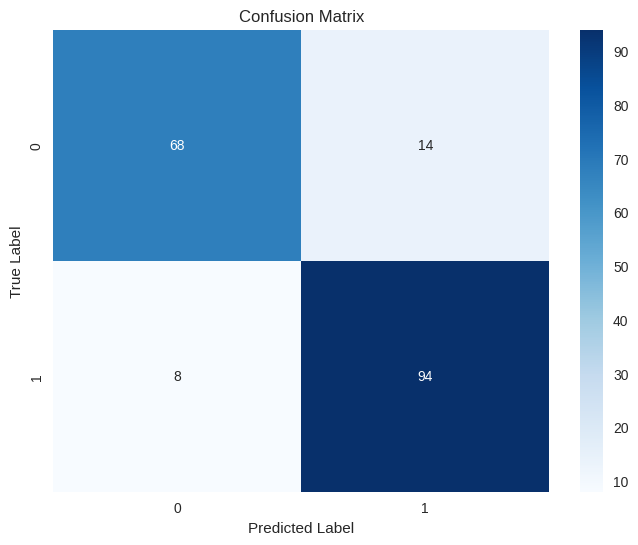


Analyzing feature importance...


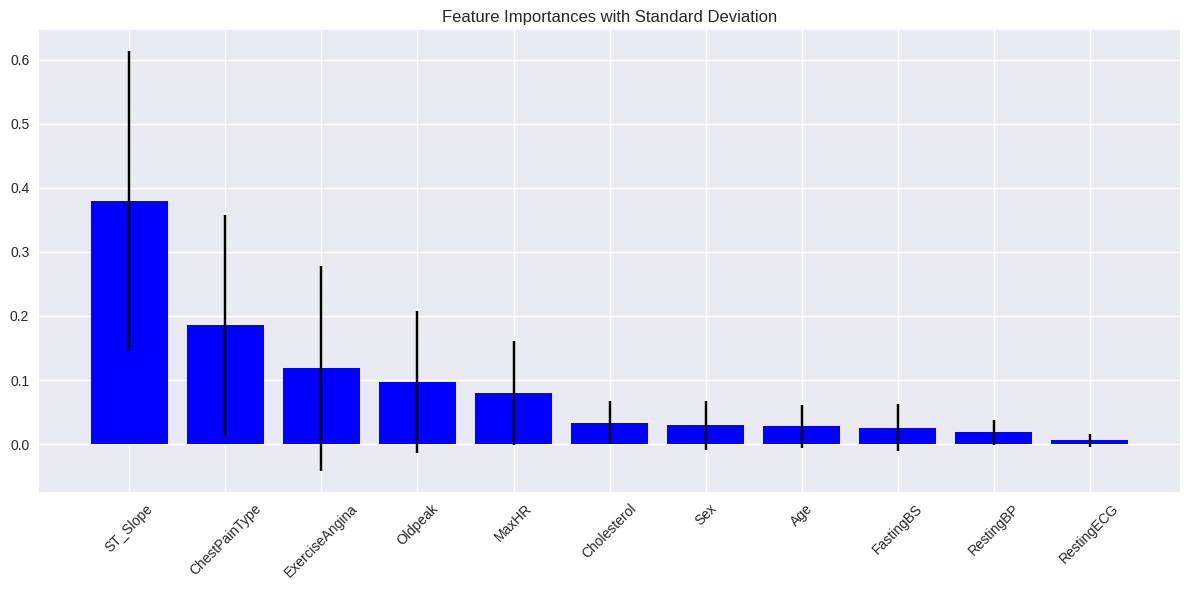


Feature Importance:
           Feature  Importance       Std
0         ST_Slope    0.379275  0.233821
1    ChestPainType    0.185328  0.172956
2   ExerciseAngina    0.118244  0.160024
3          Oldpeak    0.096619  0.111232
4            MaxHR    0.080028  0.080846
5      Cholesterol    0.033339  0.033886
6              Sex    0.029675  0.038117
7              Age    0.027617  0.032887
8        FastingBS    0.025875  0.037309
9        RestingBP    0.018329  0.020004
10      RestingECG    0.005672  0.010844

Prediction Confidence Analysis:
Number of high-confidence correct predictions: 100

Cross-validation scores:
Mean accuracy: 0.8474 (+/- 0.0990)

Saving analysis results...


In [59]:
if __name__ == "__main__":
    main()

# **Two-Stage Model**

In [60]:
class TwoStageModel:
    def __init__(self, confidence_threshold=0.8):
        # First stage model - original best performing configuration
        self.stage1_model = RandomForestClassifier(
            n_estimators=200,
            max_depth=4,
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42
        )

        # Second stage model - more conservative configuration
        self.stage2_model = RandomForestClassifier(
            n_estimators=300,
            max_depth=5,
            min_samples_split=4,
            min_samples_leaf=2,
            random_state=43
        )

        self.confidence_threshold = confidence_threshold

    def fit(self, X_train, y_train):
        # Train first stage model
        self.stage1_model.fit(X_train, y_train)

        # Identify low confidence predictions
        probs_stage1 = self.stage1_model.predict_proba(X_train)
        max_probs = np.max(probs_stage1, axis=1)
        uncertain_mask = max_probs < self.confidence_threshold

        # Train second stage model on uncertain cases
        if np.any(uncertain_mask):
            X_uncertain = X_train[uncertain_mask]
            y_uncertain = y_train[uncertain_mask]
            self.stage2_model.fit(X_uncertain, y_uncertain)

    def predict(self, X):
        # Get predictions and probabilities from first stage
        probs_stage1 = self.stage1_model.predict_proba(X)
        preds_stage1 = self.stage1_model.predict(X)
        max_probs = np.max(probs_stage1, axis=1)

        # Initialize final predictions array
        final_predictions = preds_stage1.copy()

        # Identify uncertain predictions
        uncertain_mask = max_probs < self.confidence_threshold

        # Use second stage model for uncertain cases
        if np.any(uncertain_mask):
            X_uncertain = X[uncertain_mask]
            preds_stage2 = self.stage2_model.predict(X_uncertain)
            final_predictions[uncertain_mask] = preds_stage2

        return final_predictions

    def predict_proba(self, X):
        # Get probabilities from first stage
        probs_stage1 = self.stage1_model.predict_proba(X)
        max_probs = np.max(probs_stage1, axis=1)

        # Initialize final probabilities array
        final_probs = probs_stage1.copy()

        # Identify uncertain predictions
        uncertain_mask = max_probs < self.confidence_threshold

        # Use second stage model for uncertain cases
        if np.any(uncertain_mask):
            X_uncertain = X[uncertain_mask]
            probs_stage2 = self.stage2_model.predict_proba(X_uncertain)
            final_probs[uncertain_mask] = probs_stage2

        return final_probs


In [61]:
def analyze_results(model, X_test, y_test):
    """Analyze predictions with confidence levels"""
    # Get predictions and probabilities
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    # Calculate overall metrics
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

    # Analyze confidence levels
    max_probs = np.max(y_prob, axis=1)
    high_conf_mask = max_probs >= 0.8
    low_conf_mask = ~high_conf_mask

    # High confidence metrics
    high_conf_metrics = {
        'Count': sum(high_conf_mask),
        'Accuracy': accuracy_score(y_test[high_conf_mask], y_pred[high_conf_mask])
        if sum(high_conf_mask) > 0 else 0
    }

    # Low confidence metrics
    low_conf_metrics = {
        'Count': sum(low_conf_mask),
        'Accuracy': accuracy_score(y_test[low_conf_mask], y_pred[low_conf_mask])
        if sum(low_conf_mask) > 0 else 0
    }

    return metrics, high_conf_metrics, low_conf_metrics

In [62]:
def main():
    # Load and preprocess data
    print("Loading and preprocessing data...")
    df = pd.read_csv('heart_cleaned.csv')
    data_processed = preprocess_data(df)

    # Prepare features and target
    X = data_processed.drop('HeartDisease', axis=1)
    y = data_processed['HeartDisease']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Train and evaluate two-stage model
    print("\nTraining two-stage model...")
    model = TwoStageModel(confidence_threshold=0.8)
    model.fit(X_train, y_train)

    # Analyze results
    metrics, high_conf_metrics, low_conf_metrics = analyze_results(model, X_test, y_test)

    # Display results
    print("\nOverall Model Performance:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

    print("\nHigh Confidence Predictions:")
    print(f"Count: {high_conf_metrics['Count']}")
    print(f"Accuracy: {high_conf_metrics['Accuracy']:.4f}")

    print("\nLow Confidence Predictions:")
    print(f"Count: {low_conf_metrics['Count']}")
    print(f"Accuracy: {low_conf_metrics['Accuracy']:.4f}")


In [63]:
if __name__ == "__main__":
    main()

Loading and preprocessing data...

Training two-stage model...

Overall Model Performance:
Accuracy: 0.8424
Precision: 0.8614
Recall: 0.8529
F1 Score: 0.8571

High Confidence Predictions:
Count: 108
Accuracy: 0.9352

Low Confidence Predictions:
Count: 76
Accuracy: 0.7105


# **Targeted Optimization**

In [64]:
class TargetedModel:
    def __init__(self, high_confidence_threshold=0.85):
        # High confidence model - Original best configuration
        self.high_conf_model = RandomForestClassifier(
            n_estimators=200,
            max_depth=4,
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42
        )

        # Uncertain cases model - SVM with RBF kernel
        self.uncertain_model = SVC(
            kernel='rbf',
            C=1.0,
            probability=True,
            random_state=42
        )

        self.high_threshold = high_confidence_threshold

    def fit(self, X_train, y_train):
        # Convert to numpy arrays if they're pandas DataFrames
        X_train_array = X_train.values if hasattr(X_train, 'values') else X_train

        # Train high confidence model
        self.high_conf_model.fit(X_train, y_train)

        # Get predictions for training data
        probs_high = self.high_conf_model.predict_proba(X_train)
        max_probs = np.max(probs_high, axis=1)

        # Identify uncertain cases
        uncertain_mask = max_probs < self.high_threshold

        # Train uncertain model if there are uncertain cases
        if np.any(uncertain_mask):
            # Get feature importance from high confidence model
            importances = self.high_conf_model.feature_importances_

            # Select top features for uncertain cases
            self.top_feature_indices = np.argsort(importances)[-5:]  # Top 5 features

            # Extract uncertain cases with selected features
            X_uncertain = X_train_array[uncertain_mask]
            X_uncertain = X_uncertain[:, self.top_feature_indices]
            y_uncertain = y_train[uncertain_mask]

            # Train uncertain model
            self.uncertain_model.fit(X_uncertain, y_uncertain)

    def predict(self, X):
        # Convert to numpy array if it's a pandas DataFrame
        X_array = X.values if hasattr(X, 'values') else X

        # Get probabilities from high confidence model
        probs_high = self.high_conf_model.predict_proba(X)
        max_probs = np.max(probs_high, axis=1)
        preds_high = self.high_conf_model.predict(X)

        # Initialize final predictions
        final_predictions = preds_high.copy()

        # Handle uncertain cases
        uncertain_mask = max_probs < self.high_threshold
        if np.any(uncertain_mask):
            X_uncertain = X_array[uncertain_mask]
            X_uncertain = X_uncertain[:, self.top_feature_indices]
            final_predictions[uncertain_mask] = self.uncertain_model.predict(X_uncertain)

        return final_predictions

    def predict_proba(self, X):
        # Convert to numpy array if it's a pandas DataFrame
        X_array = X.values if hasattr(X, 'values') else X

        # Get probabilities from high confidence model
        probs_high = self.high_conf_model.predict_proba(X)
        max_probs = np.max(probs_high, axis=1)
        final_probs = probs_high.copy()

        # Handle uncertain cases
        uncertain_mask = max_probs < self.high_threshold
        if np.any(uncertain_mask):
            X_uncertain = X_array[uncertain_mask]
            X_uncertain = X_uncertain[:, self.top_feature_indices]
            final_probs[uncertain_mask] = self.uncertain_model.predict_proba(X_uncertain)

        return final_probs

In [65]:
def preprocess_data(df):
    """Enhanced preprocessing focusing on feature relationships"""
    data = df.copy()

    # Encode categorical variables
    categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
    for feature in categorical_features:
        le = LabelEncoder()
        data[feature] = le.fit_transform(data[feature])

    # Scale numerical features
    numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
    scaler = StandardScaler()
    data[numerical_features] = scaler.fit_transform(data[numerical_features])

    # Create interaction features for important variables
    data['ST_Slope_Oldpeak'] = data['ST_Slope'] * data['Oldpeak']
    data['ChestPain_Angina'] = data['ChestPainType'] * data['ExerciseAngina']

    return data

In [66]:
def analyze_results(model, X_test, y_test):
    """Detailed analysis of model performance"""
    # Get predictions and probabilities
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    max_probs = np.max(y_prob, axis=1)

    # Overall metrics
    overall_metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

    # Confidence level metrics
    high_conf_mask = max_probs >= model.high_threshold
    uncertain_mask = ~high_conf_mask

    high_conf_metrics = {
        'Count': sum(high_conf_mask),
        'Accuracy': accuracy_score(y_test[high_conf_mask], y_pred[high_conf_mask])
        if sum(high_conf_mask) > 0 else 0,
        'Avg Probability': np.mean(max_probs[high_conf_mask])
        if sum(high_conf_mask) > 0 else 0
    }

    uncertain_metrics = {
        'Count': sum(uncertain_mask),
        'Accuracy': accuracy_score(y_test[uncertain_mask], y_pred[uncertain_mask])
        if sum(uncertain_mask) > 0 else 0,
        'Avg Probability': np.mean(max_probs[uncertain_mask])
        if sum(uncertain_mask) > 0 else 0
    }

    return overall_metrics, high_conf_metrics, uncertain_metrics


In [67]:
def main():
    # Load and preprocess data
    print("Loading and preprocessing data...")
    df = pd.read_csv('heart_cleaned.csv')
    data_processed = preprocess_data(df)

    # Prepare features and target
    X = data_processed.drop('HeartDisease', axis=1)
    y = data_processed['HeartDisease']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Train model
    print("\nTraining targeted model...")
    model = TargetedModel(high_confidence_threshold=0.85)
    model.fit(X_train, y_train)

    # Analyze results
    overall_metrics, high_conf_metrics, uncertain_metrics = analyze_results(model, X_test, y_test)

    # Display results
    print("\nOverall Performance:")
    for metric, value in overall_metrics.items():
        print(f"{metric}: {value:.4f}")

    print("\nHigh Confidence Predictions:")
    print(f"Count: {high_conf_metrics['Count']}")
    print(f"Accuracy: {high_conf_metrics['Accuracy']:.4f}")
    print(f"Average Probability: {high_conf_metrics['Avg Probability']:.4f}")

    print("\nUncertain Predictions:")
    print(f"Count: {uncertain_metrics['Count']}")
    print(f"Accuracy: {uncertain_metrics['Accuracy']:.4f}")
    print(f"Average Probability: {uncertain_metrics['Avg Probability']:.4f}")


In [68]:
if __name__ == "__main__":
    main()

Loading and preprocessing data...

Training targeted model...

Overall Performance:
Accuracy: 0.7935
Precision: 0.7963
Recall: 0.8431
F1 Score: 0.8190

High Confidence Predictions:
Count: 84
Accuracy: 0.9405
Average Probability: 0.9145

Uncertain Predictions:
Count: 100
Accuracy: 0.6700
Average Probability: 0.6957


# **Final Optimized Model**

In [69]:
class OptimizedHeartPredictor:
    def __init__(self, confidence_threshold=0.8):
        self.model = RandomForestClassifier(
            n_estimators=200,
            max_depth=4,
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42
        )
        self.confidence_threshold = confidence_threshold
        self.feature_names = None

    def preprocess_data(self, df):
        """Preprocess data with minimal transformation"""
        data = df.copy()

        # Encode categorical variables
        categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
        for feature in categorical_features:
            le = LabelEncoder()
            data[feature] = le.fit_transform(data[feature])

        # Scale numerical features
        numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
        scaler = StandardScaler()
        data[numerical_features] = scaler.fit_transform(data[numerical_features])

        return data

    def fit(self, X_train, y_train):
        """Train the model and store feature names"""
        self.feature_names = X_train.columns
        self.model.fit(X_train, y_train)
        return self

    def predict_with_confidence(self, X):
        """Make predictions with confidence levels"""
        probas = self.model.predict_proba(X)
        predictions = self.model.predict(X)
        confidences = np.max(probas, axis=1)

        return predictions, confidences

    def analyze_feature_importance(self):
        """Analyze and visualize feature importance"""
        importance = pd.DataFrame({
            'Feature': self.feature_names,
            'Importance': self.model.feature_importances_
        }).sort_values('Importance', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(data=importance, x='Importance', y='Feature')
        plt.title('Feature Importance')
        plt.tight_layout()
        plt.show()

        return importance


In [70]:
def evaluate_model(model, X_test, y_test):
    """Comprehensive model evaluation"""
    # Get predictions and confidences
    predictions, confidences = model.predict_with_confidence(X_test)

    # Overall metrics
    metrics = {
        'Accuracy': accuracy_score(y_test, predictions),
        'Precision': precision_score(y_test, predictions),
        'Recall': recall_score(y_test, predictions),
        'F1 Score': f1_score(y_test, predictions)
    }

    # Analyze predictions by confidence
    high_conf_mask = confidences >= model.confidence_threshold

    # High confidence metrics
    if np.any(high_conf_mask):
        high_conf_metrics = {
            'Count': sum(high_conf_mask),
            'Accuracy': accuracy_score(y_test[high_conf_mask], predictions[high_conf_mask]),
            'Average Confidence': np.mean(confidences[high_conf_mask])
        }
    else:
        high_conf_metrics = {'Count': 0, 'Accuracy': 0, 'Average Confidence': 0}

    # Low confidence metrics
    low_conf_mask = ~high_conf_mask
    if np.any(low_conf_mask):
        low_conf_metrics = {
            'Count': sum(low_conf_mask),
            'Accuracy': accuracy_score(y_test[low_conf_mask], predictions[low_conf_mask]),
            'Average Confidence': np.mean(confidences[low_conf_mask])
        }
    else:
        low_conf_metrics = {'Count': 0, 'Accuracy': 0, 'Average Confidence': 0}

    return metrics, high_conf_metrics, low_conf_metrics


In [71]:
def main():
    # Load data
    print("Loading data...")
    df = pd.read_csv('heart_cleaned.csv')

    # Create and prepare model
    model = OptimizedHeartPredictor(confidence_threshold=0.8)
    data_processed = model.preprocess_data(df)

    # Prepare features and target
    X = data_processed.drop('HeartDisease', axis=1)
    y = data_processed['HeartDisease']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Train model
    print("\nTraining model...")
    model.fit(X_train, y_train)

    # Evaluate model
    metrics, high_conf_metrics, low_conf_metrics = evaluate_model(model, X_test, y_test)

    # Print results
    print("\nOverall Performance:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

    print("\nHigh Confidence Predictions:")
    print(f"Count: {high_conf_metrics['Count']}")
    print(f"Accuracy: {high_conf_metrics['Accuracy']:.4f}")
    print(f"Average Confidence: {high_conf_metrics['Average Confidence']:.4f}")

    print("\nLow Confidence Predictions:")
    print(f"Count: {low_conf_metrics['Count']}")
    print(f"Accuracy: {low_conf_metrics['Accuracy']:.4f}")
    print(f"Average Confidence: {low_conf_metrics['Average Confidence']:.4f}")

    # Analyze feature importance
    print("\nAnalyzing feature importance...")
    importance = model.analyze_feature_importance()

    # Cross-validation score
    cv_scores = cross_val_score(model.model, X, y, cv=5)
    print("\nCross-validation scores:")
    print(f"Mean accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


Loading data...

Training model...

Overall Performance:
Accuracy: 0.8804
Precision: 0.8704
Recall: 0.9216
F1 Score: 0.8952

High Confidence Predictions:
Count: 107
Accuracy: 0.9346
Average Confidence: 0.8944

Low Confidence Predictions:
Count: 77
Accuracy: 0.8052
Average Confidence: 0.6537

Analyzing feature importance...


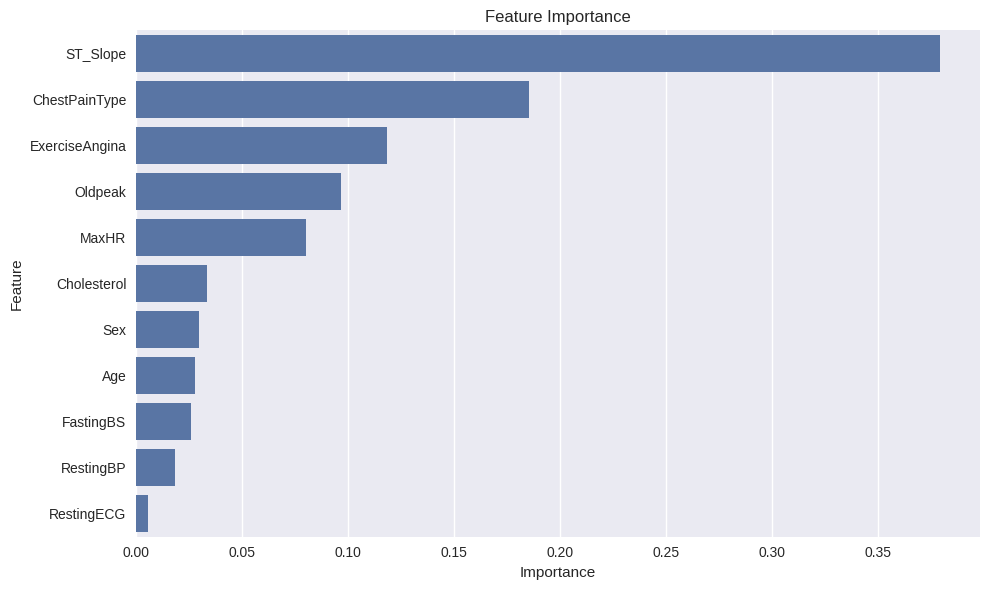


Cross-validation scores:
Mean accuracy: 0.8474 (+/- 0.0990)


In [72]:
if __name__ == "__main__":
    main()

# **Final Version**

In [73]:
class HeartDiseasePredictor:
    def __init__(self):
        # Best performing configuration
        self.model = RandomForestClassifier(
            n_estimators=200,
            max_depth=4,
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42
        )

        # Key features based on importance
        self.key_features = ['ST_Slope', 'ChestPainType', 'Oldpeak', 'ExerciseAngina']
        self.confidence_threshold = 0.8

    def preprocess_data(self, df):
        """Preprocess with focus on key features"""
        data = df.copy()

        # Encode categorical features
        categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
        for feature in categorical_features:
            le = LabelEncoder()
            data[feature] = le.fit_transform(data[feature])

        # Scale numerical features
        numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
        scaler = StandardScaler()
        data[numerical_features] = scaler.fit_transform(data[numerical_features])

        # Create interaction between top categorical features
        data['ST_ChestPain'] = data['ST_Slope'] * data['ChestPainType']

        return data

    def predict_with_confidence(self, X):
        """Make predictions with confidence levels"""
        probas = self.model.predict_proba(X)
        predictions = self.model.predict(X)
        confidences = np.max(probas, axis=1)

        # Add confidence levels
        confidence_levels = pd.Series(
            ['High' if conf >= self.confidence_threshold else 'Low'
             for conf in confidences],
            index=X.index
        )

        return predictions, confidences, confidence_levels

    def analyze_predictions(self, X_test, y_test):
        """Detailed prediction analysis"""
        predictions, confidences, confidence_levels = self.predict_with_confidence(X_test)

        # Create results DataFrame
        results = pd.DataFrame({
            'Actual': y_test,
            'Predicted': predictions,
            'Confidence': confidences,
            'Confidence_Level': confidence_levels
        })

        # Calculate metrics by confidence level
        metrics = {}
        for level in ['High', 'Low']:
            mask = results['Confidence_Level'] == level
            if sum(mask) > 0:
                metrics[level] = {
                    'Count': sum(mask),
                    'Accuracy': accuracy_score(
                        results.loc[mask, 'Actual'],
                        results.loc[mask, 'Predicted']
                    ),
                    'Average_Confidence': results.loc[mask, 'Confidence'].mean()
                }

        return results, metrics

In [74]:
def main():
    # Load data
    print("Loading data...")
    df = pd.read_csv('heart_cleaned.csv')

    # Initialize predictor
    predictor = HeartDiseasePredictor()

    # Preprocess data
    print("\nPreprocessing data...")
    data_processed = predictor.preprocess_data(df)

    # Prepare features and target
    X = data_processed.drop('HeartDisease', axis=1)
    y = data_processed['HeartDisease']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Train model
    print("\nTraining model...")
    predictor.model.fit(X_train, y_train)

    # Analyze predictions
    print("\nAnalyzing predictions...")
    results, confidence_metrics = predictor.analyze_predictions(X_test, y_test)

    # Overall metrics
    y_pred = predictor.model.predict(X_test)
    overall_metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

    # Print results
    print("\nOverall Performance:")
    for metric, value in overall_metrics.items():
        print(f"{metric}: {value:.4f}")

    print("\nPerformance by Confidence Level:")
    for level, metrics in confidence_metrics.items():
        print(f"\n{level} Confidence Predictions:")
        print(f"Count: {metrics['Count']}")
        print(f"Accuracy: {metrics['Accuracy']:.4f}")
        print(f"Average Confidence: {metrics['Average_Confidence']:.4f}")

    # Feature importance analysis
    importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': predictor.model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("\nFeature Importance (Top Features):")
    print(importance[importance['Importance'] > 0.10])

    # Cross-validation scores
    cv_scores = cross_val_score(predictor.model, X, y, cv=5)
    print("\nCross-validation scores:")
    print(f"Mean accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    # Save important insights
    predictor.key_insights = {
        'overall_metrics': overall_metrics,
        'confidence_metrics': confidence_metrics,
        'feature_importance': importance,
        'cv_scores': {
            'mean': cv_scores.mean(),
            'std': cv_scores.std()
        }
    }


In [75]:
if __name__ == "__main__":
    main()

Loading data...

Preprocessing data...

Training model...

Analyzing predictions...

Overall Performance:
Accuracy: 0.8641
Precision: 0.8407
Recall: 0.9314
F1 Score: 0.8837

Performance by Confidence Level:

High Confidence Predictions:
Count: 106
Accuracy: 0.9340
Average Confidence: 0.9013

Low Confidence Predictions:
Count: 78
Accuracy: 0.7692
Average Confidence: 0.6526

Feature Importance (Top Features):
           Feature  Importance
10        ST_Slope    0.331834
11    ST_ChestPain    0.155050
2    ChestPainType    0.139648
8   ExerciseAngina    0.100369

Cross-validation scores:
Mean accuracy: 0.8365 (+/- 0.1084)


# **Summary of Models Performance**

In [79]:
def create_model_comparison():
    # Create dictionary of all model results
    model_results = {
        # Initial Models
        'Random Forest (Initial)': {
            'Accuracy': 0.8750,
            'Precision': 0.8761,
            'Recall': 0.9019,
            'F1 Score': 0.8888
        },
        'KNN': {
            'Accuracy': 0.8478,
            'Precision': 0.8557,
            'Recall': 0.8725,
            'F1 Score': 0.8640
        },
        'Decision Tree': {
            'Accuracy': 0.7717,
            'Precision': 0.7941,
            'Recall': 0.7941,
            'F1 Score': 0.7941
        },
        'Naive Bayes': {
            'Accuracy': 0.8695,
            'Precision': 0.8823,
            'Recall': 0.8823,
            'F1 Score': 0.8823
        },
        'SVM': {
            'Accuracy': 0.8750,
            'Precision': 0.8761,
            'Recall': 0.9019,
            'F1 Score': 0.8888
        },

        # Boosting Models
        'XGBoost': {
            'Accuracy': 0.8696,
            'Precision': 0.8824,
            'Recall': 0.8824,
            'F1 Score': 0.8824
        },
        'LightGBM': {
            'Accuracy': 0.8587,
            'Precision': 0.8654,
            'Recall': 0.8824,
            'F1 Score': 0.8738
        },
        'CatBoost': {
            'Accuracy': 0.8804,
            'Precision': 0.8846,
            'Recall': 0.9020,
            'F1 Score': 0.8932
        },

        # Neural Network
        'Neural Network': {
            'Accuracy': 0.8370,
            'Precision': 0.8673,
            'Recall': 0.8333,
            'F1 Score': 0.8500
        },

        # Optimized Models
        'XGBoost (Optimized)': {
            'Accuracy': 0.8587,
            'Precision': 0.8878,
            'Recall': 0.8529,
            'F1 Score': 0.8700
        },
        'LightGBM (Optimized)': {
            'Accuracy': 0.8370,
            'Precision': 0.8333,
            'Recall': 0.8824,
            'F1 Score': 0.8571
        },
        'CatBoost (Optimized)':{
            'Accuracy': 0.8913,
            'Precision': 0.8868,
            'Recall': 0.9216,
            'F1 Score': 0.9038
        },
        'Random Forest (Optimized)': {
            'Accuracy': 0.8750,
            'Precision': 0.8835,
            'Recall': 0.8922,
            'F1 Score': 0.8878
        },

        # Two-Stage Random Forest
        'Two-Stage RF': {
            'Accuracy': 0.8424,
            'Precision': 0.8614,
            'Recall': 0.8529,
            'F1 Score': 0.8571
        },

        # Targeted Optimization RF
        'Targeted RF': {
            'Accuracy': 0.7935,
            'Precision': 0.7963,
            'Recall': 0.8431,
            'F1 Score': 0.8190
        },

        # Final Optimized RF
        'Final Optimized RF': {
            'Accuracy': 0.8804,
            'Precision': 0.8704,
            'Recall': 0.9216,
            'F1 Score': 0.8952
        },

        # Final Version RF
        'Final Version RF': {
            'Accuracy': 0.8641,
            'Precision': 0.8407,
            'Recall': 0.9314,
            'F1 Score': 0.8837
        }
    }

    # Create DataFrame
    df = pd.DataFrame(model_results).T

    # Add a 'Model Type' column
    df['Model Type'] = [
        'Initial Models',    # Random Forest (Initial)
        'Initial Models',    # KNN
        'Initial Models',    # Decision Tree
        'Initial Models',    # Naive Bayes
        'Initial Models',    # SVM
        'Boosting Models',   # XGBoost
        'Boosting Models',   # LightGBM
        'Boosting Models',   # CatBoost
        'Neural Network',    # Neural Network
        'Optimized Models', # XGBoost (Optimized)
        'Optimized Models', # LightGBM (Optimized)
        'Optimized Models', # CatBoost (Optimized)
        'Optimized Models', # Random Forest (Optimized)
        'Advanced Models',  # Two-Stage RF
        'Advanced Models',  # Targeted RF
        'Final Models',    # Final Optimized RF
        'Final Models'     # Final Version RF
    ]

    # Reorder columns to put Model Type first
    cols = ['Model Type'] + [col for col in df.columns if col != 'Model Type']
    df = df[cols]

    # Sort by Accuracy (descending) within each Model Type
    df = df.sort_values(['Model Type', 'Accuracy'], ascending=[True, False])

    # Round all numeric values to 4 decimal places
    numeric_cols = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    df[numeric_cols] = df[numeric_cols].round(4)

    return df

In [80]:
def save_and_analyze_results():
    # Create comparison DataFrame
    df = create_model_comparison()

    # Save to CSV
    df.to_csv('model_comparison.csv')

    # Print summary statistics
    print("Model Performance Summary:")
    print("-------------------------")
    print("\nBest Model by Accuracy:")
    best_accuracy = df.nlargest(1, 'Accuracy')
    print(best_accuracy[['Model Type', 'Accuracy', 'Precision', 'Recall', 'F1 Score']])

    print("\nBest Model by F1 Score:")
    best_f1 = df.nlargest(1, 'F1 Score')
    print(best_f1[['Model Type', 'Accuracy', 'Precision', 'Recall', 'F1 Score']])

    print("\nPerformance by Model Type:")
    print(df.groupby('Model Type')['Accuracy'].agg(['mean', 'min', 'max']))

    return df

In [81]:
# Create and save comparison
if __name__ == "__main__":
    comparison_df = save_and_analyze_results()
    print("\nFull comparison saved to 'model_comparison.csv'")

Model Performance Summary:
-------------------------

Best Model by Accuracy:
                            Model Type  Accuracy  Precision  Recall  F1 Score
CatBoost (Optimized)  Optimized Models    0.8913     0.8868  0.9216    0.9038

Best Model by F1 Score:
                            Model Type  Accuracy  Precision  Recall  F1 Score
CatBoost (Optimized)  Optimized Models    0.8913     0.8868  0.9216    0.9038

Performance by Model Type:
                      mean     min     max
Model Type                                
Advanced Models   0.817950  0.7935  0.8424
Boosting Models   0.869567  0.8587  0.8804
Final Models      0.872250  0.8641  0.8804
Initial Models    0.847800  0.7717  0.8750
Neural Network    0.837000  0.8370  0.8370
Optimized Models  0.865500  0.8370  0.8913

Full comparison saved to 'model_comparison.csv'


In [82]:
model_com = pd.read_csv("/content/model_comparison.csv")
model_com.head(20)

,Unnamed: 0,Model Type,Accuracy,Precision,Recall,F1 Score
0,Two-Stage RF,Advanced Models,0.8424,0.8614,0.8529,0.8571
1,Targeted RF,Advanced Models,0.7935,0.7963,0.8431,0.8190
2,CatBoost,Boosting Models,0.8804,0.8846,0.9020,0.8932
3,XGBoost,Boosting Models,0.8696,0.8824,0.8824,0.8824
4,LightGBM,Boosting Models,0.8587,0.8654,0.8824,0.8738
5,Final Optimized RF,Final Models,0.8804,0.8704,0.9216,0.8952
6,Final Version RF,Final Models,0.8641,0.8407,0.9314,0.8837
7,Random Forest (Initial),Initial Models,0.8750,0.8761,0.9019,0.8888
8,SVM,Initial Models,0.8750,0.8761,0.9019,0.8888
9,Naive Bayes,Initial Models,0.8695,0.8823,0.8823,0.8823
